# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

This project focuses on the unsupervised machine learning task of customer segmentation for an online retail business using RFM analysis . The main objective is to develop an effective model that can identify and group customers into distinct segments based on their recency, frequency, and monetary value.

To achieve this, the project will leverage a comprehensive dataset containing customer transactional data, which will be preprocessed to ensure data quality. RFM analysis will be performed to calculate individual scores for each customer, reflecting their recent purchasing activity, frequency of purchases, and monetary value. These scores will serve as valuable indicators of customer behavior.


Next, the K-means clustering and Hierarchial Clustering algorithms will be applied to cluster customers based on their RFM scores. The resulting customer segments will provide meaningful insights for the online retail business. These insights can be utilized to optimize marketing strategies by tailoring campaigns and offers to specific customer groups, as well as to allocate resources more efficiently. By delivering personalized experiences and targeted recommendations to different customer segments, the business can enhance customer satisfaction and loyalty, ultimately gaining a competitive advantage in the market.

Overall, this project aims to leverage unsupervised machine learning techniques, RFM analysis, and clustering algorithms to enable the online retail business to better understand its customer base and make informed business decisions that lead to improved customer engagement and profitability.

# **GitHub Link -**

https://github.com/Dheeraj-Budhlakoti/Online_Retail_Customer_Segmentation

# **Problem Statement**


**Business Context**

In this project, the main task is to identify major customer segments on a transnational data set which contains all the transactions occuring between 01/02/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and registered non online all-occasion gifts. Many customers of the company are wholesalers.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# For datetime
import datetime as dt

# For 3d plots
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

# For Hyopothesis Testing
from scipy.stats import ttest_ind
from scipy import stats

# For Model training
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Capstone Project Unsupervised/Online Retail.xlsx")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

Total Rows: 541909
Total Columns: 8


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

5268

In [ ]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# checking new shape
df.shape

(536641, 8)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

<Axes: >

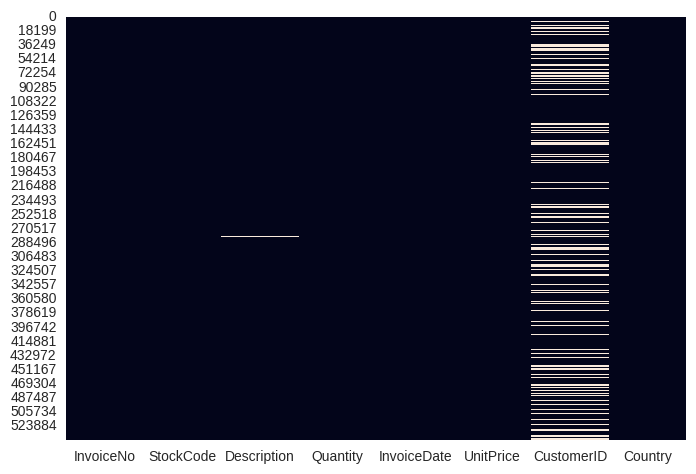

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isna(), cbar=False)

### What did you know about your dataset?

* It is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

* The dataset had 541909 Rows and 8 Columns, out of which 5268 were duplicates so after droping duplicates now we have 536641 rows and 8 columns.

* The  dataset also has some missing values which need to be fixed.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

Quantity      UnitPrice     CustomerID
count  536641.000000  536641.000000  401604.000000
mean        9.620029       4.632656   15281.160818
std       219.130156      97.233118    1714.006089
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13939.000000
50%         3.000000       2.080000   15145.000000
75%        10.000000       4.130000   16784.000000
max     80995.000000   38970.000000   18287.000000

### Variables Description

* #### **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* #### **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* #### **Description**: Product (item) name. Nominal.
* #### **Quantity**: The quantities of each product (item) per transaction. Numeric.
* #### **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.
* #### **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
* #### **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* #### **Country**: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Firstly making a copy of the dataset
work_df=df.copy()

In [ ]:
# Checking null values
work_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

* Here CustomerID has 135037 null values and since our analysis is based on customers, I have to remove these missing values as I can't just impute customer ID as it is a unique ID given to every customer.

In [ ]:
# Dropping null CustomerID values.
work_df=work_df[pd.notnull(work_df['CustomerID'])]

In [ ]:
# Rechecking null values
work_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

* Now as seen in describe() method O/P Quantity and Unit Price has some negative values which can't be valid, so I have to remove them.

In [ ]:
work_df=work_df[work_df['Quantity']>0]
work_df=work_df[work_df['UnitPrice']>0]

In [ ]:
# Checking new shape
work_df.shape

(392692, 8)

* As mentioned in Invoice number description it is a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation and which means these Invoice no. should be dropped before analysis.

In [ ]:
# Converting column to string
work_df['InvoiceNo'] = work_df['InvoiceNo'].astype('str')

# Dropping InvoiceNo.s containing C
work_df=work_df[~work_df['InvoiceNo'].str.contains('C'or'c')]

In [ ]:
# Checking new shape
work_df.shape

(392692, 8)

* The shape remains same after filtering invoice no. which means no cancelled orders are present.

In [ ]:
# Creating Total Price column
work_df['Total Price']=work_df['Quantity']*work_df['UnitPrice']

In [ ]:
# Creating day column for analysis
work_df['Day']=work_df['InvoiceDate'].dt.day

In [ ]:
# Creating date column for analysis
work_df['Date']=work_df['InvoiceDate'].dt.date

In [ ]:
# Creating hour column for analysis
work_df["hour"]=work_df['InvoiceDate'].dt.hour

In [ ]:
work_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France   
541905 2011-12-09 12:50:00       2.10     12680.0          France   
541906 2011-12-09 12:50:00       4.15     12680.0          France   
541907 2011-12-09 12:50:00       4.15     12680.0          France   
541908 2011-12-09 12:50:00       4.95     12680.0          France   

        Total Price  Day        Date  hour  
0             15.30    1  2010-12-01     8  
1             20.34    1  2010-12-01     8  
2             22.00    1  2010-12-01     8  
3             20.34    1  2010-12-01     8  
4             20.34    1  2010-12-01     8  
...             ...  ...         ...   ...  
541904        10.20    9  2011-12-09    12  
541905        12.60    9  2011-12-09    12  
541906        16.60    9  2011-12-09    12  
541907        16.60    9  2011-12-09    12  
541908        14.85    9  2011-12-09    12  

[392692 rows x 12 columns]

### What all manipulations have you done and insights you found?

* Firstly I created a copy of the dataset.

* Then I dropped null 'CustomerID' values since our analysis is based on customers and imputing 'CustomerID' is not possible as it is a unique ID given to every customer.

* After that 'Quantity' and 'Unit Price' had some negative values which can't be valid, so I removed them.

* Then as mentioned in Invoice number description, it is a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation so I tried dropping them but the datset had no cancelled orders.

* Finally I created 4 columns named 'Total Price' i.e.'Quantity' multiplied by 'UnitPrice', 'Day'- day no. of month, 'Date' - extracted from datetime and 'Hour' for analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Analysis 1 - Highest Bill Invoice Generated

In [ ]:
# creating a df to check invoice generated with highest amount
Invoice_df=work_df.groupby(['InvoiceNo']).agg({'Description':'count','Total Price':'sum'}).reset_index().rename(columns={'Description':'No. of Items','Total Price':'Invoice Amount'}).sort_values('Invoice Amount',ascending=False)
Invoice_df.head(10)

InvoiceNo  No. of Items  Invoice Amount
18499    581483             1       168469.60
1909     541431             1        77183.60
7925     556444             1        38970.00
12417    567423            12        31698.16
8111     556917           138        22775.93
14456    572209             7        22206.00
12409    567381            12        22104.80
10842    563614            97        21880.44
5462     550461             5        21535.90
14368    572035           125        20277.92

In [ ]:
# Higest generated invoice details
work_df[work_df['InvoiceNo']=='581483']

InvoiceNo StockCode                  Description  Quantity  \
540421    581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country  \
540421 2011-12-09 09:15:00       2.08     16446.0  United Kingdom   

        Total Price  Day        Date  hour  
540421     168469.6    9  2011-12-09     9

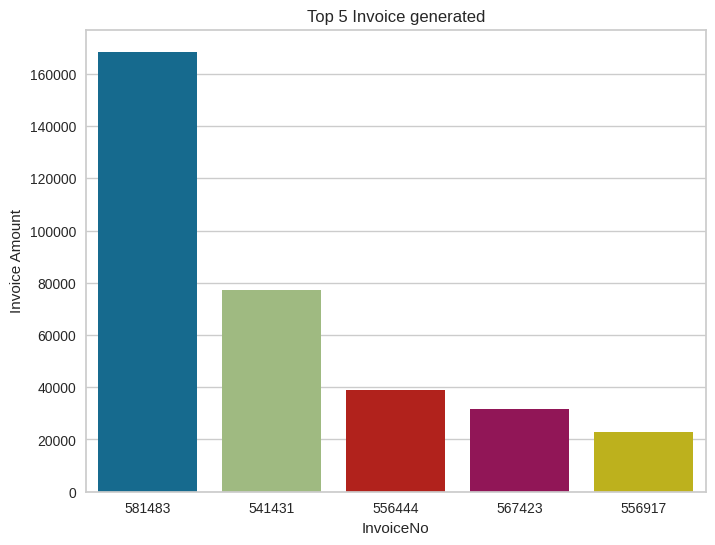

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Top 5 Invoice generated')
sns.barplot(x='InvoiceNo',y='Invoice Amount',data=Invoice_df[:5])
# plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

* I used a simple bar plot here to show top 5 highest amount invoices generated.

##### 2. What is/are the insight(s) found from the chart?

* From this chart I can say that the invoice no. 581483 was the highest amount invoice generated and it contained a single unique item of 2.08 unit price and 80995 quantity. The invoice was generated on 2011-12-09 09:15:00 .The reason behind this might be a stock clearence sale or something related.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* No significant insights were found here that could help create a positive business impact.

#### Analysis 2 - Best Products

In [ ]:
# Creating a Description_df containing counts of no. of times each item was ordered irrespetive of quantity.
Description_df=work_df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

Description_Name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2016
1            REGENCY CAKESTAND 3 TIER   1713
2             JUMBO BAG RED RETROSPOT   1615
3       ASSORTED COLOUR BIRD ORNAMENT   1395
4                       PARTY BUNTING   1389

In [ ]:
Description_df.tail()

Description_Name  Count
3872         GREEN WITH METAL BAG CHARM      1
3873         WHITE WITH METAL BAG CHARM      1
3874  BLUE/NAT SHELL NECKLACE W PENDANT      1
3875            PINK EASTER HENS+FLOWER      1
3876        PAPER CRAFT , LITTLE BIRDIE      1

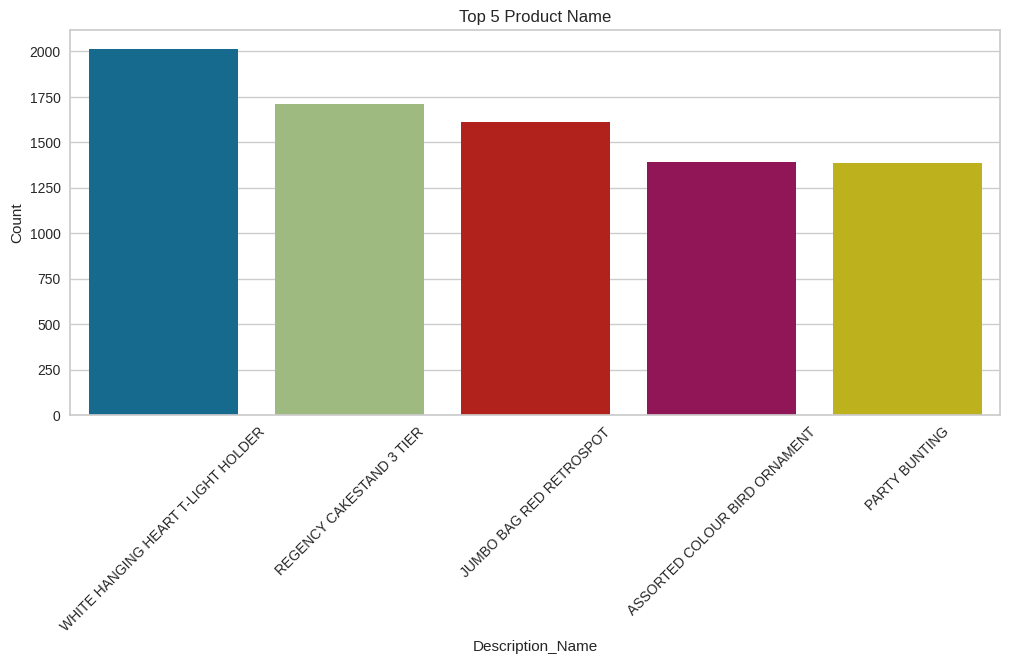

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])
plt.xticks(rotation=45)
plt.show()

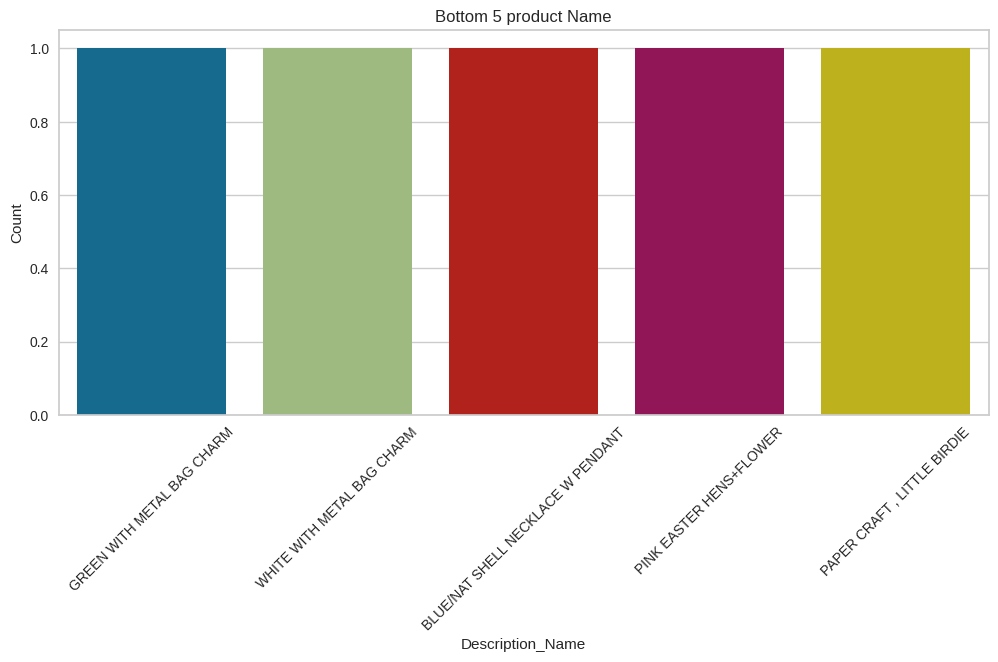

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

* I again used barplot here as it is very good in comparing catgories or values.

##### 2. What is/are the insight(s) found from the chart?

**Top 5 most ordered products**:
1. WHITE HANGING HEART T-LIGHT HOLDER,
2. REGENCY CAKESTAND 3 TIER
3. JUMBO BAG RED RETROSPOT
4. LUNCH BAG RED RETROSPOT
5. PARTY BUNTING

**Bottom 5 products**:
1. GREEN WITH METAL BAG CHARM
2. WHITE WITH METAL BAG CHARM
3. BLUE/NAT SHELL NECKLACE W PENDANT
4. PINK EASTER HENS+FLOWER
5. PAPER CRAFT , LITTLE BIRDIE

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* This insight can help the business focus on promoting and optimizing these products, ensuring their availability, and potentially expanding the product line with similar items to cater to customer demand. It can also inform inventory management decisions to ensure sufficient stock of these popular products.

#### Analysis 3 - Best Stocks

In [ ]:
# Creating a StockCode_df with its value_counts
StockCode_df=work_df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
StockCode_df.head()

StockCode_Name  Count
0         85123A   2023
1          22423   1713
2         85099B   1615
3          84879   1395
4          47566   1389

In [ ]:
StockCode_df.tail()

StockCode_Name  Count
3660         90059A      1
3661          20678      1
3662         90059D      1
3663          90168      1
3664          23843      1

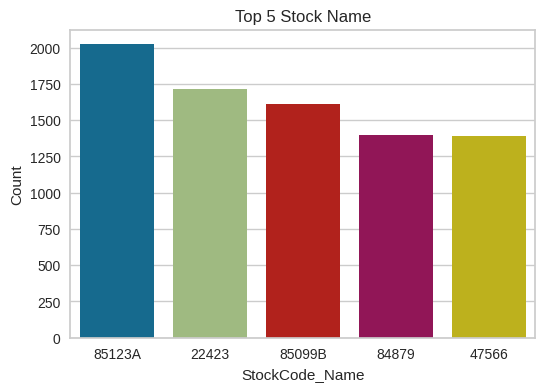

In [ ]:
# Plotting barplot for top 5 Stockcode
plt.figure(figsize=(6,4))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])
plt.show()

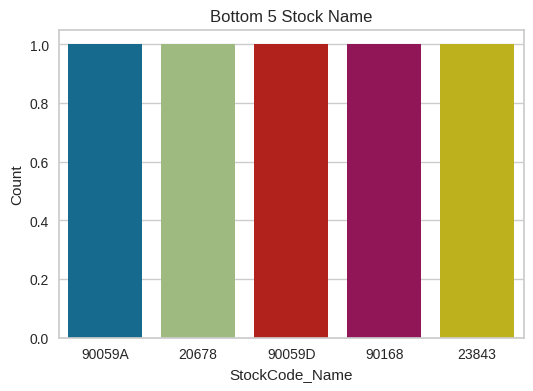

In [ ]:
# Plotting barplot for bottom 5 Stockcode
plt.figure(figsize=(6,4))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[-5:])
plt.show()

##### 1. Why did you pick the specific chart?

* I again used barplot here as it is very good in comparing catgories or values.

##### 2. What is/are the insight(s) found from the chart?

**Top 5 Stock name based on selling are** :
1. 85123A
2. 22423
3. 85099B
4. 84879
5. 47566

**Bottom 5 Stock name based on selling are** :
1. 90059A
2. 20678
3. 90059D
4. 90168
5. 23843

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, again these insight can help the business focus on promoting and optimizing these stock products, ensuring their availability, and potentially expanding the product line with similar items to cater to customer demand. It can also inform inventory management decisions to ensure sufficient stock of these popular products.

#### Analysis 4 - Time Series Analysis

In [ ]:
time_series_df=work_df.groupby('Date')['Total Price'].sum()
time_series_df

Date
2010-12-01     46192.49
2010-12-02     47197.57
2010-12-03     23876.63
2010-12-05     31361.28
2010-12-06     31009.33
                ...    
2011-12-05     58081.09
2011-12-06     45989.66
2011-12-07     69230.60
2011-12-08     50395.96
2011-12-09    184329.66
Name: Total Price, Length: 305, dtype: float64

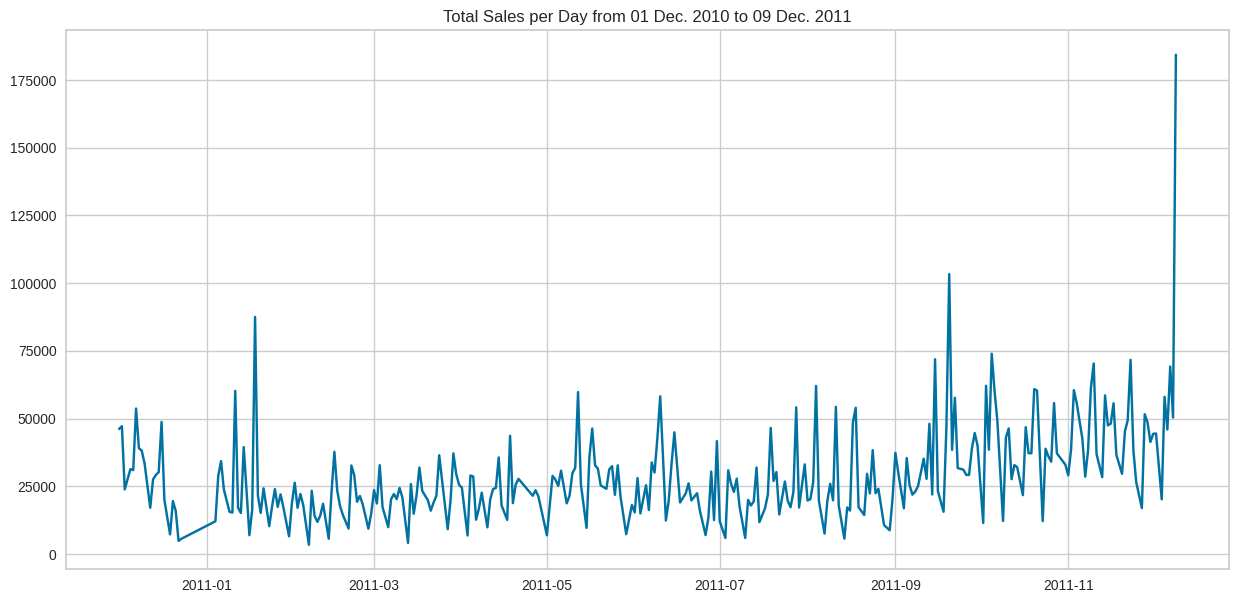

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(15, 7))
plt.plot(time_series_df)
plt.title('Total Sales per Day from 01 Dec. 2010 to 09 Dec. 2011')
plt.grid(True)
plt.show()

In [ ]:
# Function to plot moving average
from sklearn.metrics import mean_absolute_error
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

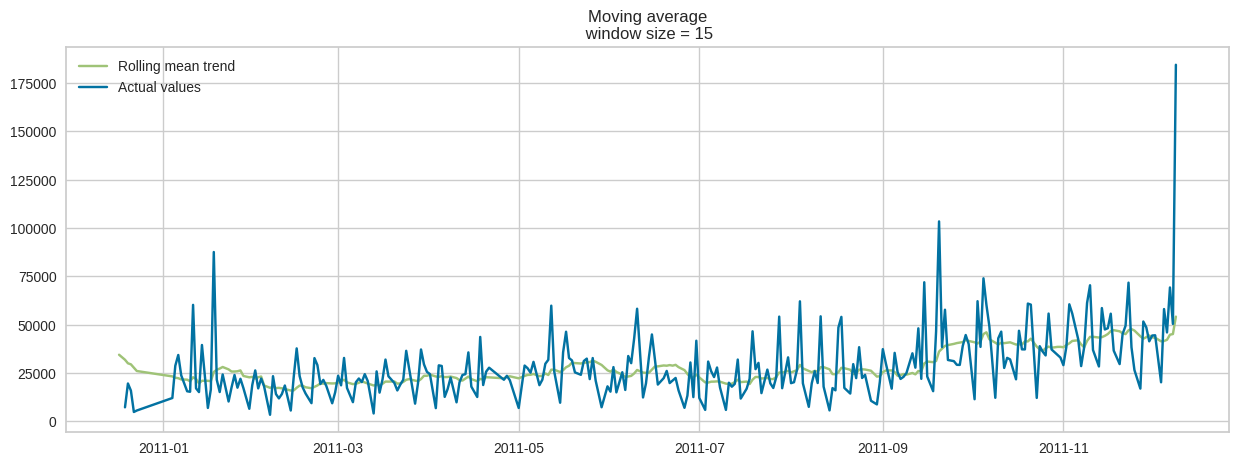

In [ ]:
# rolling average for 5 days window
plotMovingAverage(time_series_df, 15)

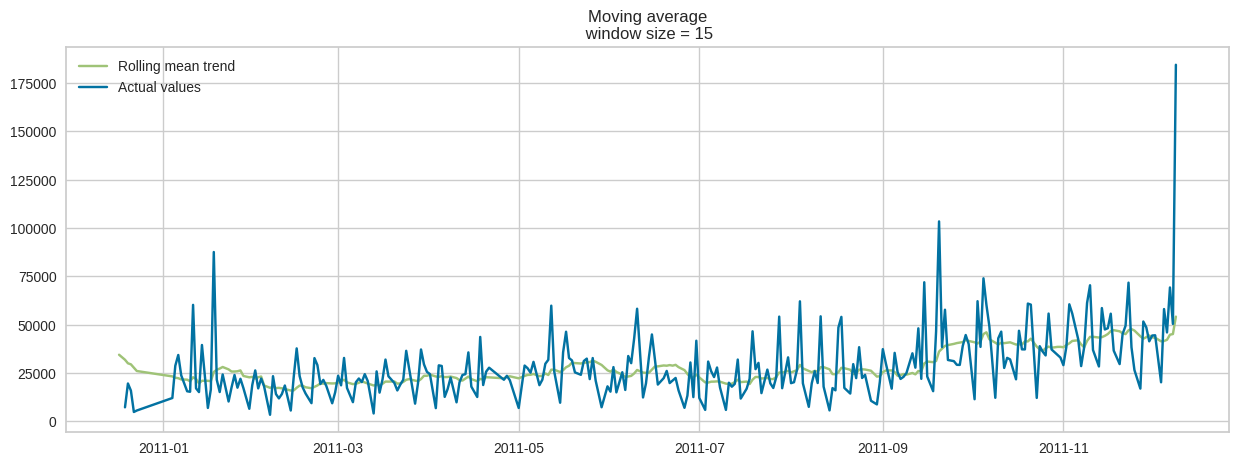

In [ ]:
# rolling average for 15 days window
plotMovingAverage(time_series_df, 15)

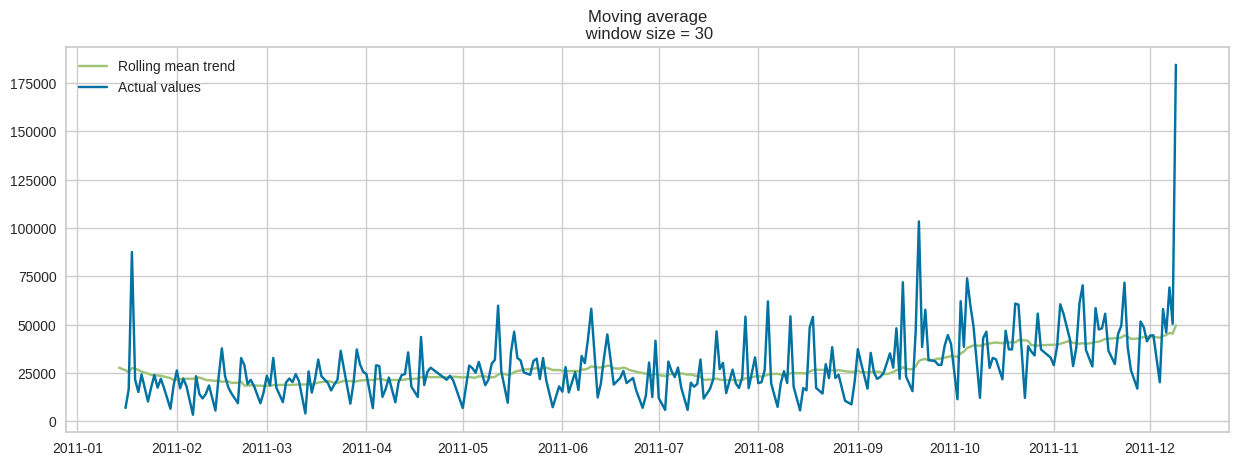

In [ ]:
# rolling average for 30 days window
plotMovingAverage(time_series_df, 30)

##### 1. Why did you pick the specific chart?

I have picked simple line chart as it is best for Time Series Analysis.

##### 2. What is/are the insight(s) found from the chart?

Based on the smoothened plot I can say that there is a gradual increase in Total sales amount generated per day which is a good sign for business.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the gradual increase in total sales amount over time allows the business to forecast future revenue trends. By analyzing historical patterns and projecting them into the future, the business can estimate future sales performance and adjust strategies accordingly, such as setting sales targets, budgeting, and resource allocation.

#### Analysis 5 - Sales vs Month Days

In [ ]:
# Creating a day_df for analyzing sales with days of month.
day_df=work_df.groupby('Day')['Total Price'].sum()

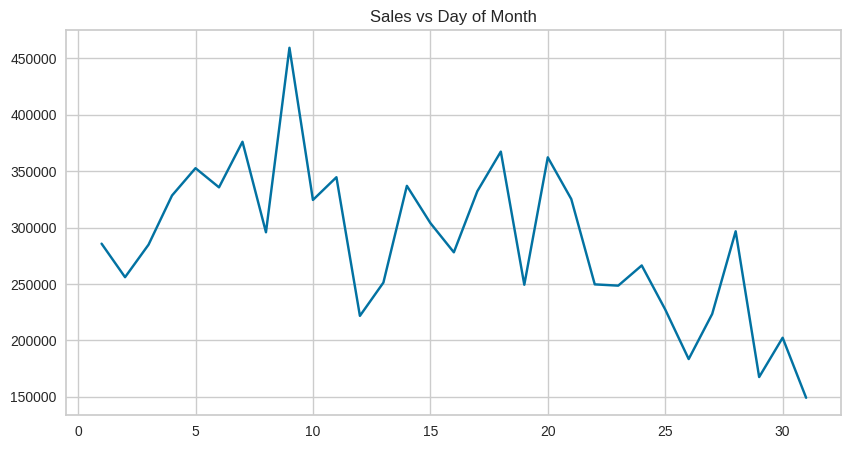

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 5))
plt.plot(day_df)
plt.title('Sales vs Day of Month')
plt.grid(True)
plt.show()

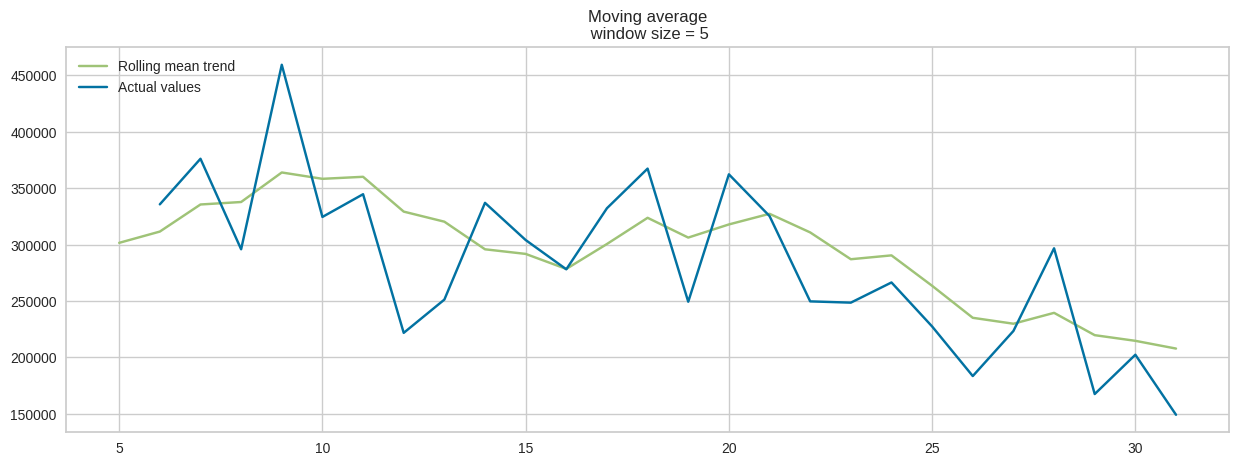

In [ ]:
# rolling average for 5 days window
plotMovingAverage(day_df, 5)

##### 1. Why did you pick the specific chart?

* I have again used linchart here and then smoothened it show trend of sales amount vs days of month.

##### 2. What is/are the insight(s) found from the chart?

* Sales peak during the first ten days of the month and then start to decline. This may be because individuals tend to spend more at the beginning of the month since they often receive their paychecks at the end of the current month or at the beginning of the next one.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* The insight that sales are highest during the first 10 days of the month and gradually decrease towards the end can potentially create a positive business impact. It allows the business to focus marketing efforts, promotions, and inventory management strategies during the early days when sales are typically high. It helps in maximizing revenue generation and ensuring sufficient stock availability during peak periods.
* However, it also highlight potential challenges in sales during the latter half of the month, requiring the business to analyze the reasons behind the decline and implement strategies to sustain or boost sales during that period. Neglecting to address this decline may lead to negative growth in sales during the latter part of the month.

#### Analysis 6 - Most Ordered Products

In [ ]:
# Creating a quantiy_df for checking item for which most quantity is ordered
quantity_df=work_df.groupby('Description')['Quantity'].sum().reset_index().rename(columns={'Quantity':'Total Quantity Ordered'}).sort_values('Total Quantity Ordered',ascending=False)
quantity_df.head()

Description  Total Quantity Ordered
2319         PAPER CRAFT , LITTLE BIRDIE                   80995
1992      MEDIUM CERAMIC TOP STORAGE JAR                   77916
3786   WORLD WAR 2 GLIDERS ASSTD DESIGNS                   54319
1762             JUMBO BAG RED RETROSPOT                   46078
3698  WHITE HANGING HEART T-LIGHT HOLDER                   36706

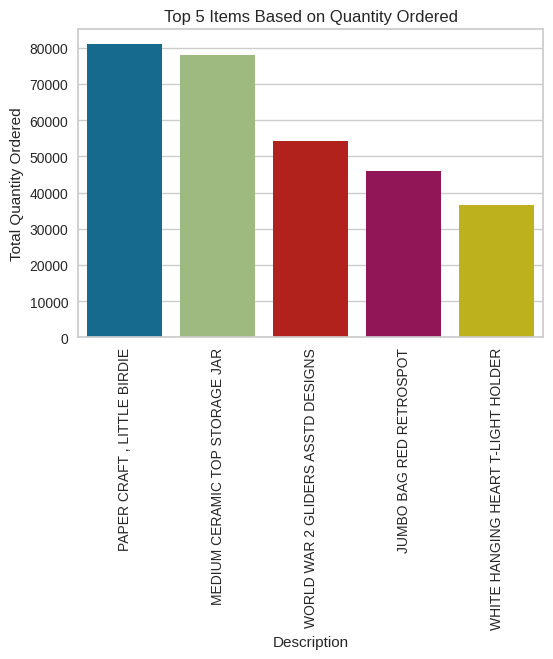

In [ ]:
# Plotting barplot for top 5 items based on quantity ordered
plt.figure(figsize=(6,4))
plt.title('Top 5 Items Based on Quantity Ordered')
sns.barplot(x='Description',y='Total Quantity Ordered',data=quantity_df[:5])
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

* I again used barplot here as it is very good in comparing catgories or values.

##### 2. What is/are the insight(s) found from the chart?

**Top 5 Items Based on Quantity Ordered**:
1. PAPER CRAFT , LITTLE BIRDIE
2. MEDIUM CERAMIC TOP STORAGE JAR
3. WORLD WAR 2 GLIDERS ASSTD DESIGNS
4. JUMBO BAG RED RETROSPOT
5. WHITE HANGING HEART T-LIGHT HOLDER

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* This information may assist the company in concentrating on marketing and optimising these products, assuring their availability, and possibly growing the product line with comparable items to meet consumer demand. Making informed judgements about inventory management can help keep plenty of these well-liked goods on hand.

#### Analysis 7 - Countries vs No. of Customers

In [ ]:
# Creating a country_df to find countries with most customers
customer_country=work_df[['Country','CustomerID']].drop_duplicates()
country_df=customer_country.groupby(['Country'])['CustomerID'].count().reset_index().rename(columns={'CustomerID':'No. of Customers'}).sort_values('No. of Customers',ascending=False)
country_df.head()

Country  No. of Customers
35  United Kingdom              3920
14         Germany                94
13          France                87
30           Spain                30
3          Belgium                25

In [ ]:
country_df.tail()

Country  No. of Customers
28        Saudi Arabia                 1
29           Singapore                 1
16             Iceland                 1
4               Brazil                 1
11  European Community                 1

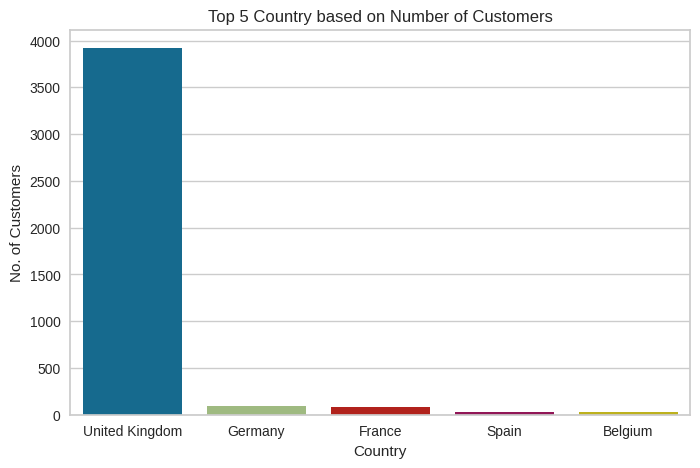

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(8,5))
plt.title('Top 5 Country based on Number of Customers')
sns.barplot(x='Country',y='No. of Customers',data=country_df[:5])
plt.show()

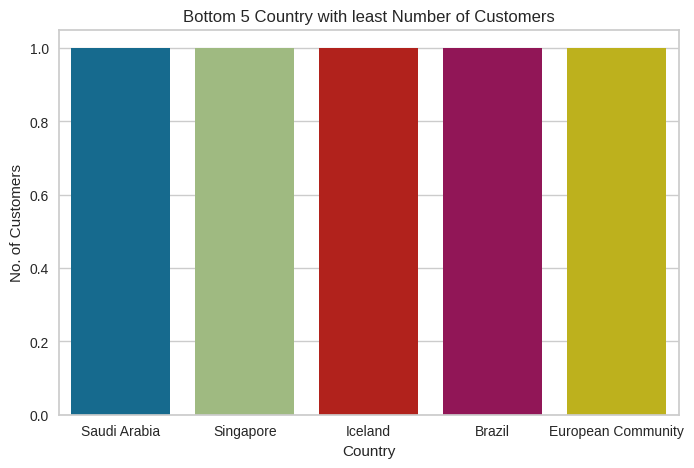

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Bottom 5 Country with least Number of Customers')
sns.barplot(x='Country',y='No. of Customers',data=country_df[-5:])
plt.show()

##### 1. Why did you pick the specific chart?

* I again used barplot here as it is very good in comparing catgories or values.

##### 2. What is/are the insight(s) found from the chart?

**Top 5 Country based on Number of Customers**:
1. United Kingdom (approx 90% customers)
2. Germany
3. France
4. Spain
5. Belgium

**Bottom 5 Country with least Number of Customers**:
1. Saudi Arabia
2. Singapore
3. Iceland
4. Brazil
5. European Community

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, this insight highlights the importance of catering to the needs and preferences of customers from these countries, allowing the business to tailor marketing strategies, customer support, and localization efforts to maximize sales and customer satisfaction.

#### Analysis 8 - Unit Price Distribution plot

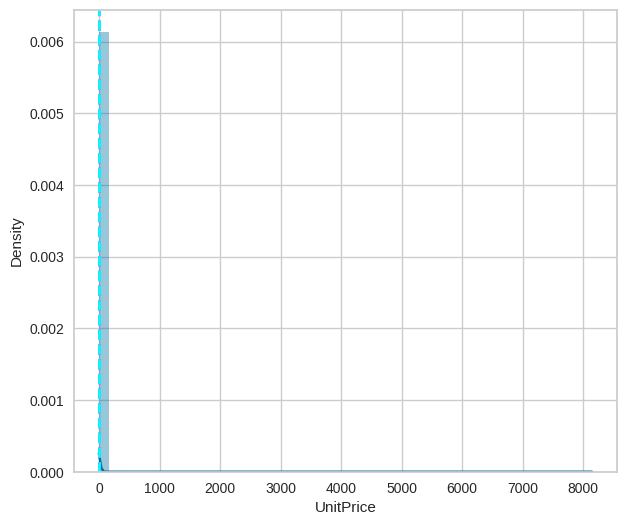

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(7,6))
ax=sns.distplot(work_df['UnitPrice'])
ax.axvline(work_df['UnitPrice'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(work_df['UnitPrice'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

##### 1. Why did you pick the specific chart?

* I have used a seaborn distplot here to check the distribution of UnitPrice.

##### 2. What is/are the insight(s) found from the chart?

* In the plot we can see that it is highly positive skewed, which means most of the values are low and few values are high.

#### Chart 9 - Quantity Distribution Plot

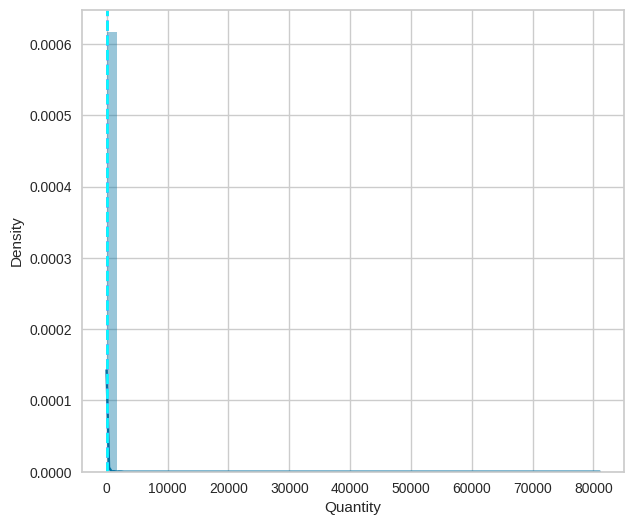

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(7,6))
ax=sns.distplot(work_df['Quantity'])
ax.axvline(work_df['Quantity'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(work_df['Quantity'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

##### 1. Why did you pick the specific chart?

* I have used a seaborn distplot here to check the distribution of UnitPrice.

##### 2. What is/are the insight(s) found from the chart?

* In this 'Quantity' distribution plot again we can see that it is highly positive skewed, which means most of the values are low and few values are high which is justified as normally people order very low quantity (mostly 1) of items, high quantity item orders are rare and usually occur during flash sales or stock clearence sales etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* To create a positive business impact, the business should leverage the insight to optimize inventory management, streamline supply chain processes, and design effective promotions to encourage higher quantity orders. Failing to do so might result in missed opportunities for increased sales and customer engagement.

#### Analysis 10 - Busiest Hours

In [ ]:
# Creating hour_df to find busiest hours
hour_df=work_df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

Hour_Name  Count
0          12  70938
1          13  63019
2          14  53251
3          11  48365
4          15  44790
5          10  37773
6          16  23715
7           9  21927
8          17  12941
9           8   8687
10         19   3233
11         18   2895
12         20    778
13          7    379
14          6      1

<Axes: title={'center': 'Hour'}, xlabel='Hour_Name', ylabel='Count'>

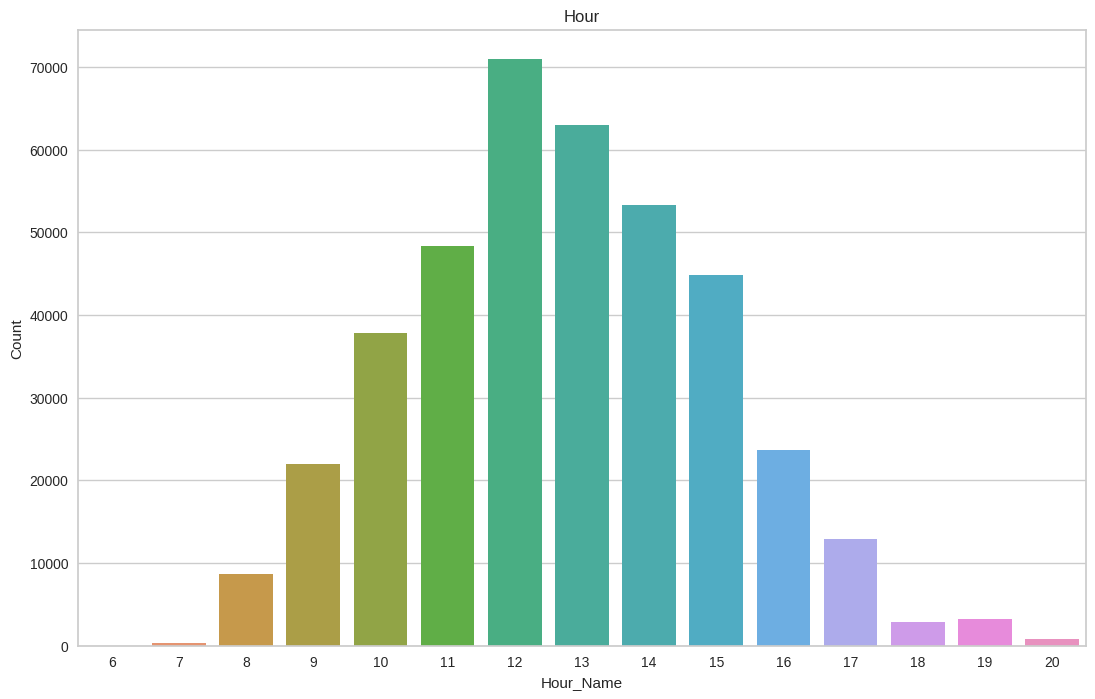

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

##### 1. Why did you pick the specific chart?

* I have again used a barplot here to compare value_counts for different hours.

##### 2. What is/are the insight(s) found from the chart?

* The insight found from the chart is that noon hours around 9 am to 4 pm are the most busy hours and it peaks around 11 am to 1 pm.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* To create a positive business impact, the business should leverage the insight to optimize inventory management during peak hours, streamline supply chain processes, and design effective promotions to encourage higher quantity orders. Failing to do so might result in missed opportunities for increased sales and customer engagement.

#### Analysis 11 - Correlation Heatmap

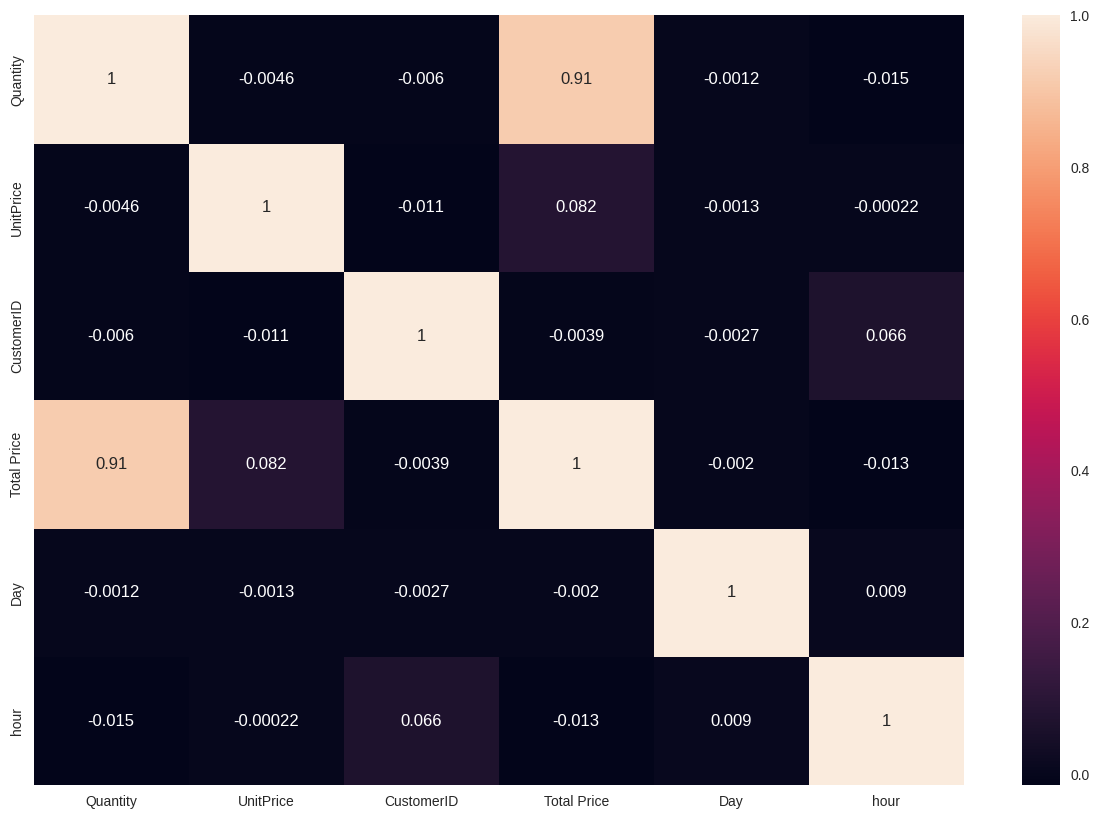

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(work_df.corr(), annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

* A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

* Thus to know the correlation between all the variables along with the correlation coeficients, I used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

* From the heatmap we can see that the variable 'Total Price' is high positively correlated with 'Quantity' more than 'UnitPrice'. This suggests that high Total Price values are mostly due to high quantity orders.
* So putting more emphasis on this insight can lead to higher business growth.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* Hypothesis 01: There are distinct purchasing patterns between weekdays and weekends.

* Hypothesis 02: The distribution of 'UnitPrice' follows a normal distribution.

* Hypothesis 03: The distribution of 'Quantity' follows a normal distribution.

In [ ]:
# Function to give conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0): There is no significant difference in purchasing patterns between weekdays and weekends.
* Alternative Hypothesis (H1):  There is a significant difference in purchasing patterns between weekdays and weekends.
* Test: t-test for means

#### 2. Perform an appropriate statistical test.

In [ ]:
# Extracting Day of Week from InvoiceDate column
work_df['DayOfWeek'] = work_df['InvoiceDate'].dt.day_name()

# Perform Statistical Test to obtain P-Value
t_statistic, p_value = ttest_ind(work_df[work_df['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['Total Price'],
                                work_df[work_df['DayOfWeek'].isin(['Saturday', 'Sunday'])]['Total Price'])
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(conclusion(p_value))

T-statistic: 8.482949326294396
P-value: 2.2030126636067624e-17
Null Hypothesis rejected Successfully for p = 2.2030126636067624e-17


##### Which statistical test have you done to obtain P-Value?

T-test for means

##### Why did you choose the specific statistical test?

I choose this test because it is a test for the null hypothesis that 2 independent samples have identical average (expected) values.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis (H0): The distribution of 'UnitPrice' follows a normal distribution.
* Alternative hypothesis (Ha): The distribution of 'UnitPrice' does not follow a normal distribution.
* Test: Z-test for normality.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
Unit_Price = work_df['UnitPrice'].tolist()

# z-test for normality
z_statistic, p_value = stats.normaltest(Unit_Price)

# Print the z-statistic and conclusion with p value
print("Z-statistic:", z_statistic)
print(conclusion(p_value))

Z-statistic: 1928722.1548132284
Null Hypothesis rejected Successfully for p = 0.0


##### Which statistical test have you done to obtain P-Value?

Z-test for normality

##### Why did you choose the specific statistical test?

* I chose the Z-test for normality to test Hypothesis 2 (The distribution of 'UnitPrice' follows a normal distribution) because it specifically focuses on assessing the normality of a distribution.

* The Z-test for normality is a statistical test used to determine whether a given dataset follows a normal distribution. It is based on comparing the sample data to the expected values under a normal distribution assumption.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis (H0): The distribution of 'Quantity' follows a normal distribution.
* Alternative hypothesis (Ha): The distribution of 'Quantity' does not follow a normal distribution.
* Test: Z-test for normality.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
Quantity = work_df['Quantity'].tolist()

# z-test for normality
z_statistic, p_value = stats.normaltest(Quantity)

# Print the z-statistic and conclusion with p value
print("Z-statistic:", z_statistic)
print(conclusion(p_value))

Z-statistic: 2332520.9989947965
Null Hypothesis rejected Successfully for p = 0.0


##### Which statistical test have you done to obtain P-Value?

Z-test for normality.

##### Why did you choose the specific statistical test?

* I chose the Z-test for normality to test Hypothesis 2 (The distribution of 'Quantity' follows a normal distribution) because it specifically focuses on assessing the normality of a distribution.

* The Z-test for normality is a statistical test used to determine whether a given dataset follows a normal distribution. It is based on comparing the sample data to the expected values under a normal distribution assumption.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

* Done already in data wrangling part.

### 2. Handling Outliers

* For outliers treatment, there were some -ve and 0 values for UnitPrice and Quantity column so I handled it in data wrangling part. And as for very high values I will be normalizing them later to fix them

### 3. Categorical Encoding

* I will be doing RFM based customer segmentation and for that categorical encoding is not required.

### 4. Textual Data Preprocessing - N/A
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

* For this customer segmentation project I will be using **RFM (Recency, Frequency, Monetary)** analysis as it is a very valuable customer segmentation technique used in various industries.

* Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on.

* Since, recency is calculated for a point in time, I will be using the 2nd next date to the last date for which data is available (2nd next date so that receny value for less than 24 hours difference is not 0).

In [ ]:
# Oldest Date
work_df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [ ]:
# Latest Date
work_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

* The last invoice date is 2011-12-09, so I will use 2011-12-11 to calculate recency.

In [ ]:
# Creating Date variable to calulate recency
NOW=dt.datetime(2011,12,11)

In [ ]:
# Create RFM_df to store RFM Modelling scores for each customer
RFM_df=work_df.groupby('CustomerID').agg({'InvoiceDate':lambda x:(NOW -x.max()).days,
                                      'InvoiceNo':'count',
                                      'Total Price':'sum'})

In [ ]:
work_df.shape

(392692, 13)

In [ ]:
RFM_df.head()

InvoiceDate  InvoiceNo  Total Price
CustomerID                                     
12346.0             326          1     77183.60
12347.0               3        182      4310.00
12348.0              76         31      1797.24
12349.0              19         73      1757.55
12350.0             311         17       334.40

In [ ]:
RFM_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceDate  4338 non-null   int64  
 1   InvoiceNo    4338 non-null   int64  
 2   Total Price  4338 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


In [ ]:
# Renaming column names to Recency, Frequency and Monetary
RFM_df.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Total Price': 'Monetary'}, inplace=True)
RFM_df.head()

Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           3        182   4310.00
12348.0          76         31   1797.24
12349.0          19         73   1757.55
12350.0         311         17    334.40

####2. RFM Analysis

* Here I will first segment the customers into four segments using quantiles and then ans some questions which can be useful for business based on customers RFM scores.

In [ ]:
# Splitting into four segments using quantiles
quantiles=RFM_df.quantile(q=[0.25,0.5,0.75])
quantiles=quantiles.to_dict()

In [ ]:
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 142.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.48249999999996, 0.5: 668.57, 0.75: 1660.5974999999999}}

In [ ]:
# Creating RFM_segmented df
RFM_segmented=RFM_df.copy()

In [ ]:
# Function for recency
def Rscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [ ]:
# Function for frequency and monetary
def FMscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
# Calculating R, F and M segement values
RFM_segmented['R']=RFM_segmented['Recency'].apply(lambda x: Rscore(x,'Recency',quantiles))
RFM_segmented['F']=RFM_segmented['Frequency'].apply(lambda x: FMscore(x,'Frequency',quantiles))
RFM_segmented['M']=RFM_segmented['Monetary'].apply(lambda x: FMscore(x,'Monetary',quantiles))
RFM_segmented.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         326          1  77183.60  4  4  1
12347.0           3        182   4310.00  1  1  1
12348.0          76         31   1797.24  3  3  1
12349.0          19         73   1757.55  2  2  1
12350.0         311         17    334.40  4  4  3

In [ ]:
# Creating a RFM class column
RFM_segmented['RFMClass'] = RFM_segmented.R.map(str) + RFM_segmented.F.map(str) + RFM_segmented.M.map(str)
RFM_segmented.head()

Recency  Frequency  Monetary  R  F  M RFMClass
CustomerID                                                
12346.0         326          1  77183.60  4  4  1      441
12347.0           3        182   4310.00  1  1  1      111
12348.0          76         31   1797.24  3  3  1      331
12349.0          19         73   1757.55  2  2  1      221
12350.0         311         17    334.40  4  4  3      443

##### Top 10 best customers

In [ ]:
RFM_segmented[RFM_segmented['RFMClass']=='111'].sort_values('Monetary',ascending=False).head(10)

Recency  Frequency   Monetary  R  F  M RFMClass
CustomerID                                                 
14646.0           2       2076  280206.02  1  1  1      111
18102.0           1        431  259657.30  1  1  1      111
17450.0           9        336  194390.79  1  1  1      111
14911.0           2       5670  143711.17  1  1  1      111
14156.0          10       1395  117210.08  1  1  1      111
17511.0           3        963   91062.38  1  1  1      111
16684.0           5        277   66653.56  1  1  1      111
14096.0           5       5111   65164.79  1  1  1      111
13694.0           4        568   65039.62  1  1  1      111
15311.0           1       2366   60632.75  1  1  1      111

##### Customers who might have left the platform

In [ ]:
#Customers who's Recency value is high
RFM_segmented[RFM_segmented['R'] >= 3 ].sort_values('Recency', ascending=False).head(10)

Recency  Frequency  Monetary  R  F  M RFMClass
CustomerID                                                
13065.0         374         14    205.86  4  4  4      444
12791.0         374          2    192.60  4  4  4      444
17643.0         374          8    101.55  4  4  4      444
14237.0         374          9    161.00  4  4  4      444
18074.0         374         13    489.60  4  4  3      443
13747.0         374          1     79.60  4  4  4      444
17908.0         374         54    232.03  4  2  4      424
15165.0         374         27    487.75  4  3  3      433
16274.0         374         65    351.75  4  2  3      423
18011.0         374         28    102.79  4  3  4      434

* As you can see all these cutomers haven't ordered anything for more than a year.

##### Most loyal customers

In [ ]:
#Customers with high frequency value
RFM_segmented[RFM_segmented['F'] <= 2 ].sort_values('Frequency', ascending=False).head(10)

Recency  Frequency   Monetary  R  F  M RFMClass
CustomerID                                                 
17841.0           2       7676   40519.84  1  1  1      111
14911.0           2       5670  143711.17  1  1  1      111
14096.0           5       5111   65164.79  1  1  1      111
12748.0           1       4412   33053.19  1  1  1      111
14606.0           2       2677   12076.15  1  1  1      111
15311.0           1       2366   60632.75  1  1  1      111
14646.0           2       2076  280206.02  1  1  1      111
13089.0           3       1814   58762.08  1  1  1      111
13263.0           2       1667    7436.93  1  1  1      111
14298.0           9       1637   51527.30  1  1  1      111

### 5. Data Transformation

In [ ]:
# Transform Your data
RFM_df.describe()

Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     93.059474    90.523744    2048.688081
std     100.012264   225.506968    8985.230220
min       1.000000     1.000000       3.750000
25%      18.000000    17.000000     306.482500
50%      51.000000    41.000000     668.570000
75%     142.750000    98.000000    1660.597500
max     374.000000  7676.000000  280206.020000

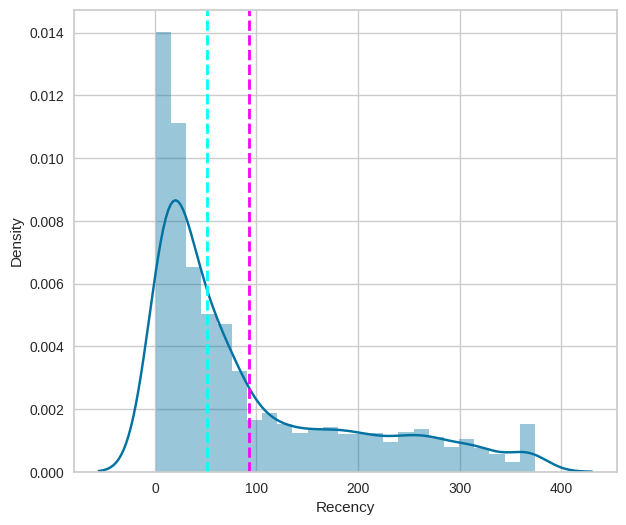

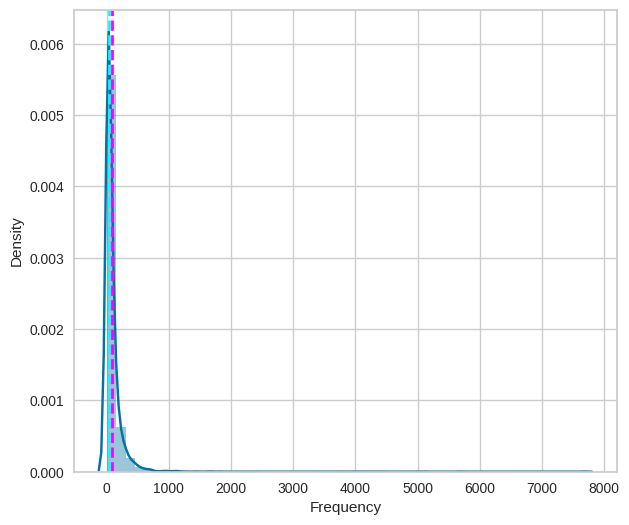

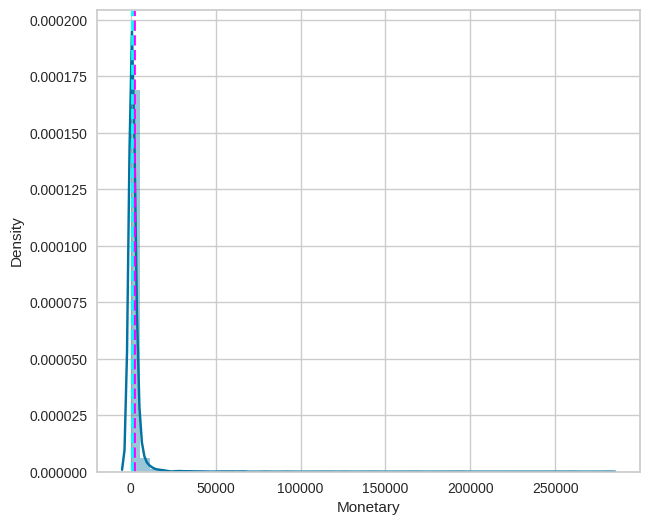

In [ ]:
# Loop to plot distribution graphs of RFM features
numerical_features=['Recency','Frequency','Monetary']
for col in numerical_features:
  plt.figure(figsize=(7,6))
  ax=sns.distplot(RFM_df[col])
  ax.axvline(RFM_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(RFM_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
# Applying Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFM_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

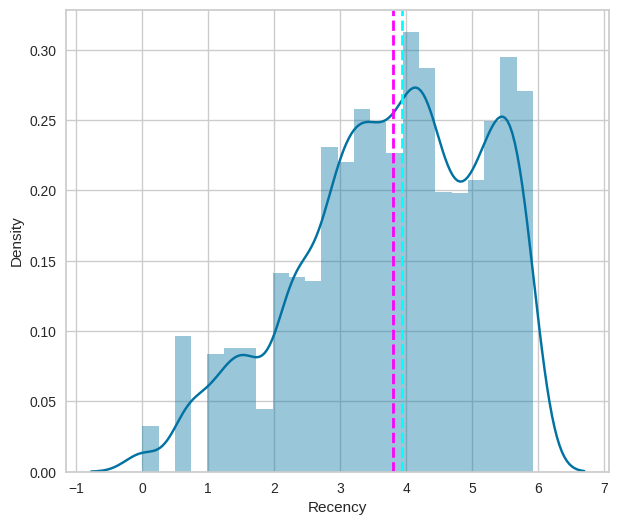

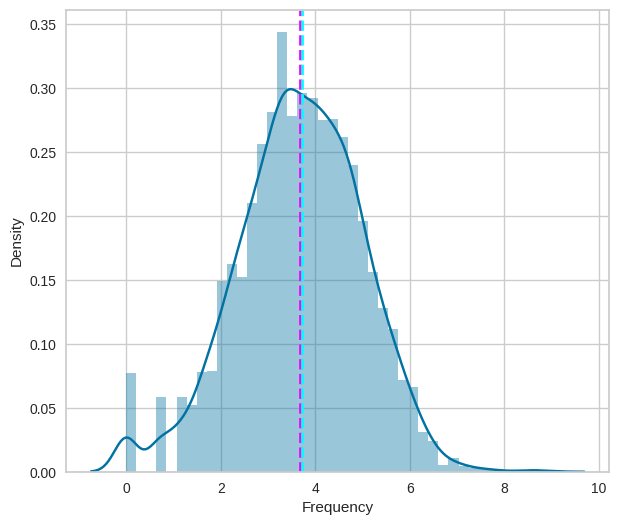

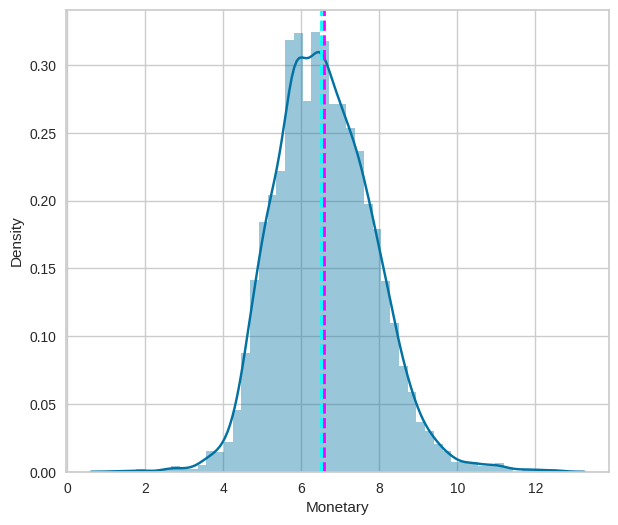

In [ ]:
# Loop to plot distribution graphs of RFM features after log transformation
numerical_features=['Recency','Frequency','Monetary']
for col in numerical_features:
  plt.figure(figsize=(7,6))
  ax=sns.distplot(Log_Tfd_Data[col])
  ax.axvline(Log_Tfd_Data[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(Log_Tfd_Data[col].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

* Yes, the data needed to be transformed as all R, F and M value distributions were highly skewed, so I applied log transformation in all three.
* And as you can see now we are getting almost normal distributions for almost all values.

### 6. Data Scaling

In [ ]:
# Scaling your data
Log_Tfd_Data.rename(columns={'Recency':'Recency_log','Frequency':'Frequency_log','Monetary':'Monetary_log'},inplace=True)
Log_Tfd_Data.head()

Recency_log  Frequency_log  Monetary_log
CustomerID                                          
12346.0           5.787          0.000        11.254
12347.0           1.099          5.204         8.369
12348.0           4.331          3.434         7.494
12349.0           2.944          4.290         7.472
12350.0           5.740          2.833         5.812

In [ ]:
# Scaling the data
scaler=StandardScaler()
df_scaled= scaler.fit_transform(Log_Tfd_Data)

##### Which method have you used to scale you data and why?

* I have used a Standard Scaler here to transform the data.

### 7. Dimesionality Reduction - N/A

##### Do you think that dimensionality reduction is needed? Explain Why?

* Dimensionality reduction is not typically required for RFM-based models. RFM analysis already reduces the data to three key dimensions: recency, frequency, and monetary value. These three metrics capture the most important aspects of customer behavior and are used for customer segmentation.

In [ ]:
# DImensionality Reduction (If needed)

### 8. Data Splitting -  N/A

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset - N/A

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model 1 - K Means Clustering

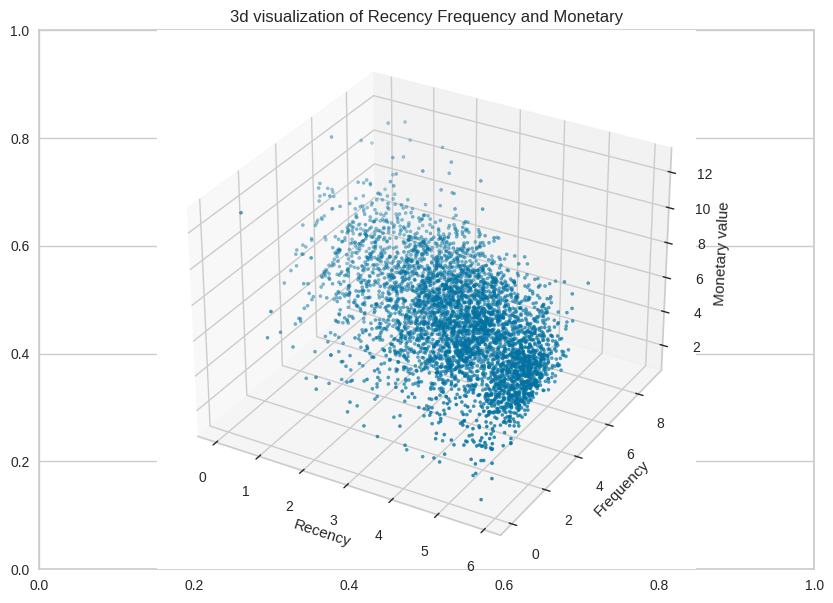

In [ ]:
# Plotting 3D plot for Recency, Frequency and Monetary
fig=plt.figure(figsize=(10,7))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=Log_Tfd_Data.loc[:,'Recency_log']
ys=Log_Tfd_Data.loc[:,'Frequency_log']
zs=z=Log_Tfd_Data.loc[:,'Monetary_log']
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

In [ ]:
# Plotting Interactive 3d plot for Recency, Frequency and Monetary
fig=px.scatter_3d(Log_Tfd_Data,x=Log_Tfd_Data.loc[:,'Recency_log'],
              y=Log_Tfd_Data.loc[:,'Frequency_log'],
              z=Log_Tfd_Data.loc[:,'Monetary_log'])
# fig.update_layout(margin=dict(l=20,t=20,b=20))
fig.show()

For n_clusters = 2 The average silhouette_score is : 0.3952871546404954
For n_clusters = 3 The average silhouette_score is : 0.3033887996461411
For n_clusters = 4 The average silhouette_score is : 0.30095490894113636
For n_clusters = 5 The average silhouette_score is : 0.2787328581750258
For n_clusters = 6 The average silhouette_score is : 0.27632485864433154
For n_clusters = 7 The average silhouette_score is : 0.2650838779333536
For n_clusters = 8 The average silhouette_score is : 0.26200690364100987
For n_clusters = 9 The average silhouette_score is : 0.2584312210918312
For n_clusters = 10 The average silhouette_score is : 0.2585237581562346
For n_clusters = 11 The average silhouette_score is : 0.26554002613916333
For n_clusters = 12 The average silhouette_score is : 0.26185927510049023
For n_clusters = 13 The average silhouette_score is : 0.26259144736312207
For n_clusters = 14 The average silhouette_score is : 0.26058574612852564
For n_clusters = 15 The average silhouette_score is 

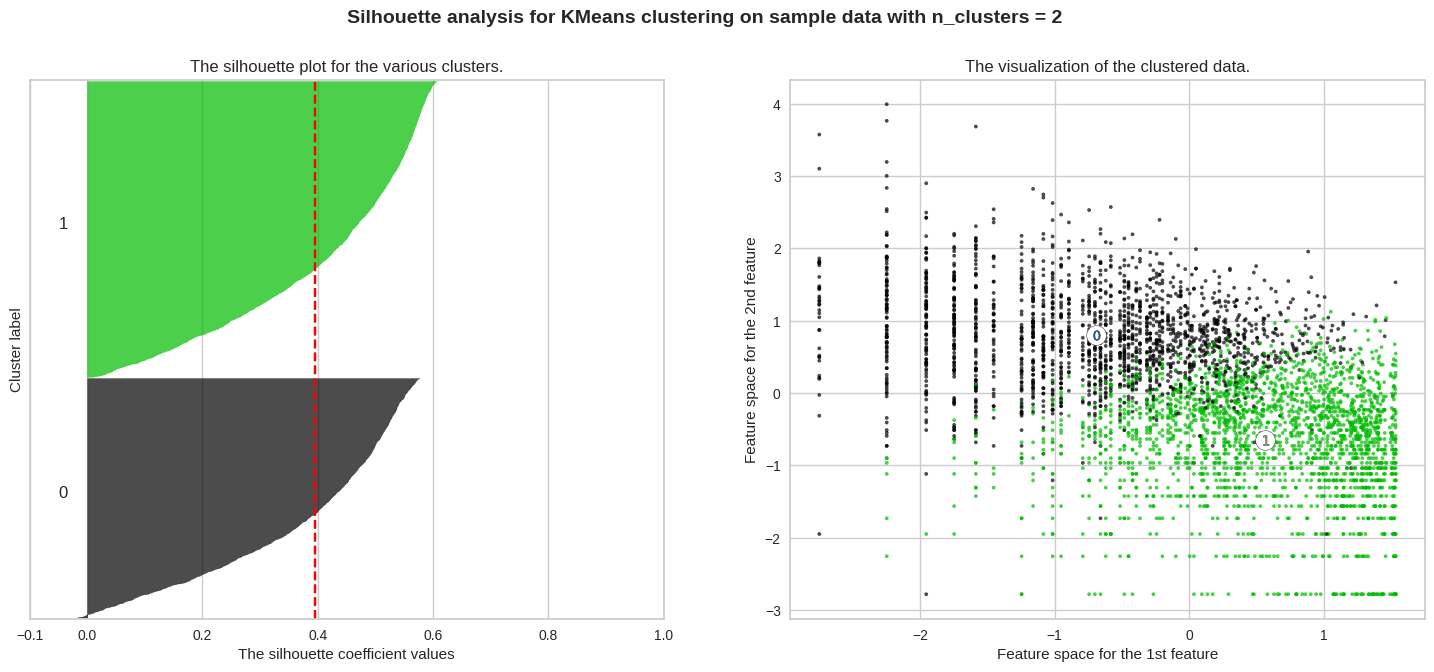

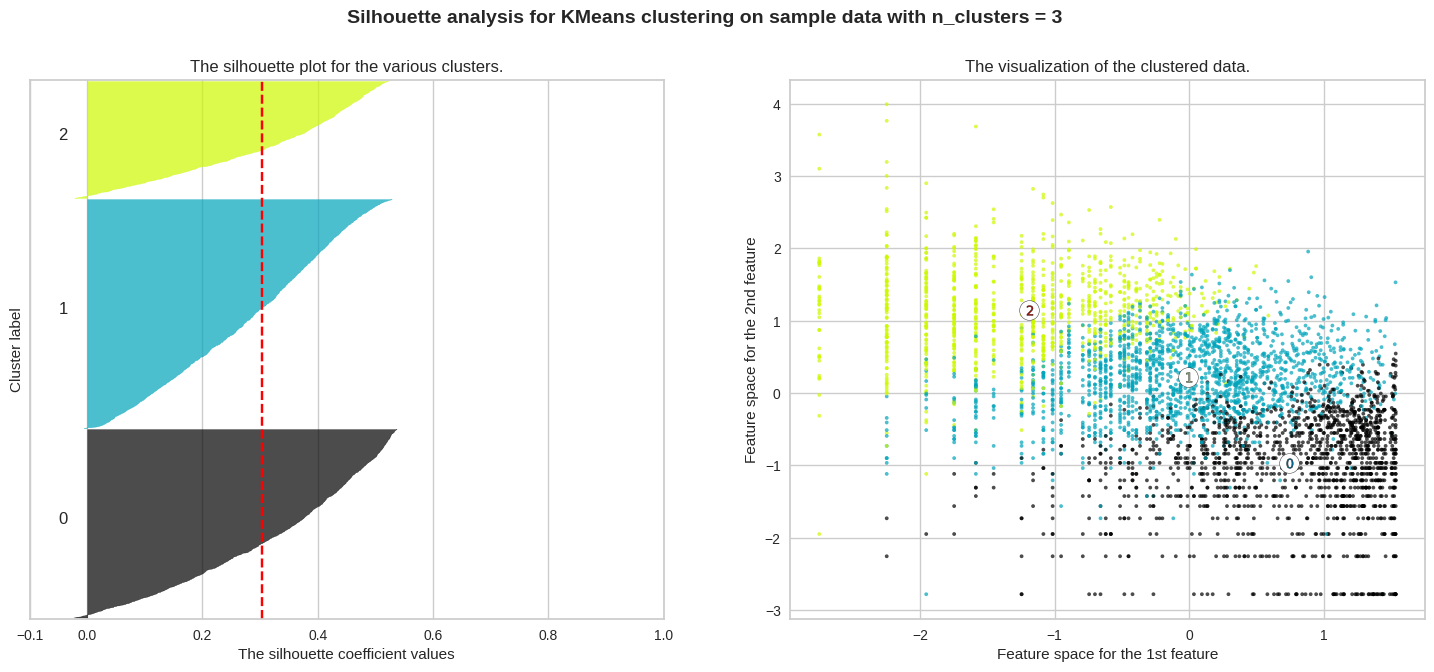

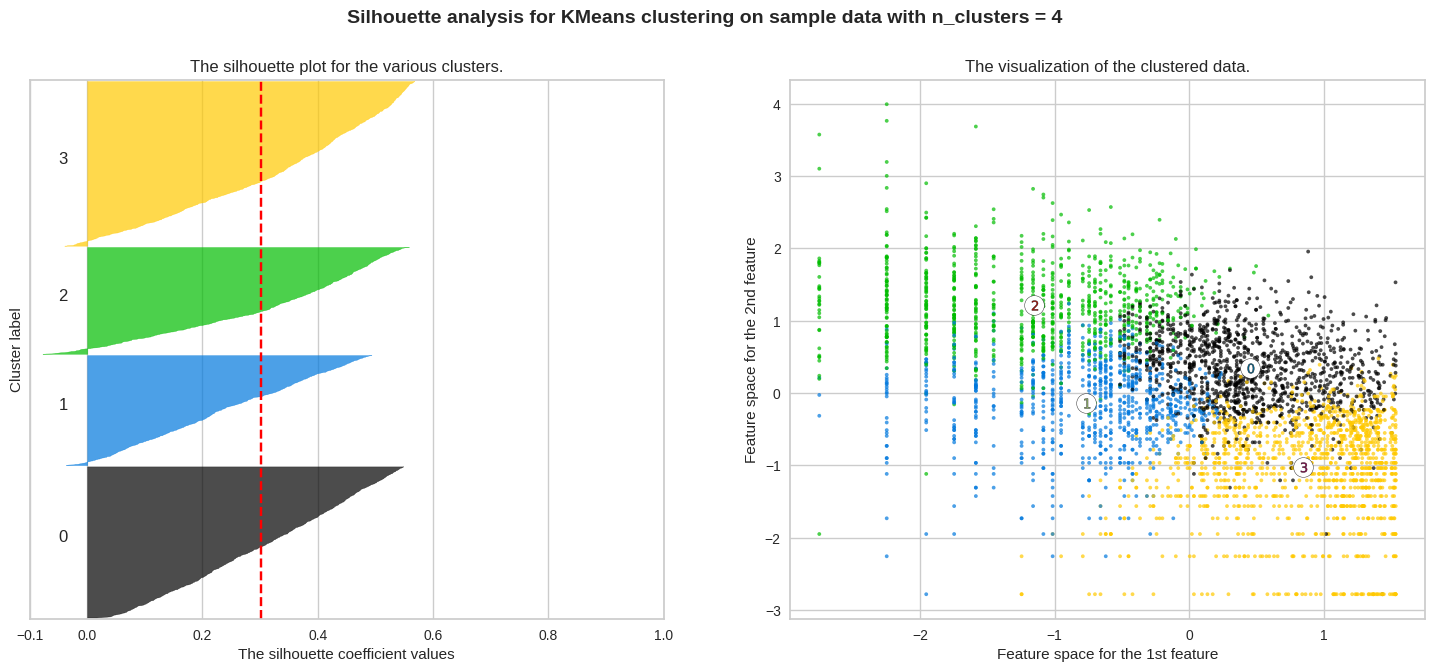

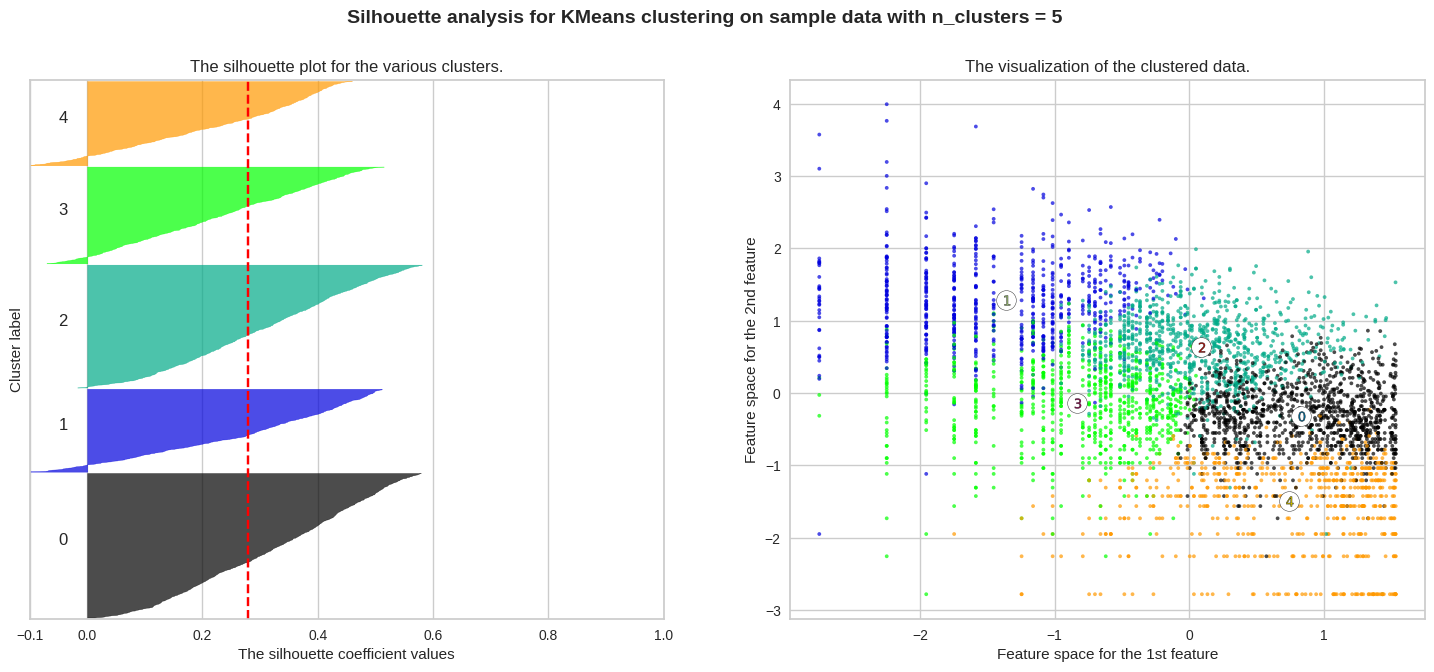

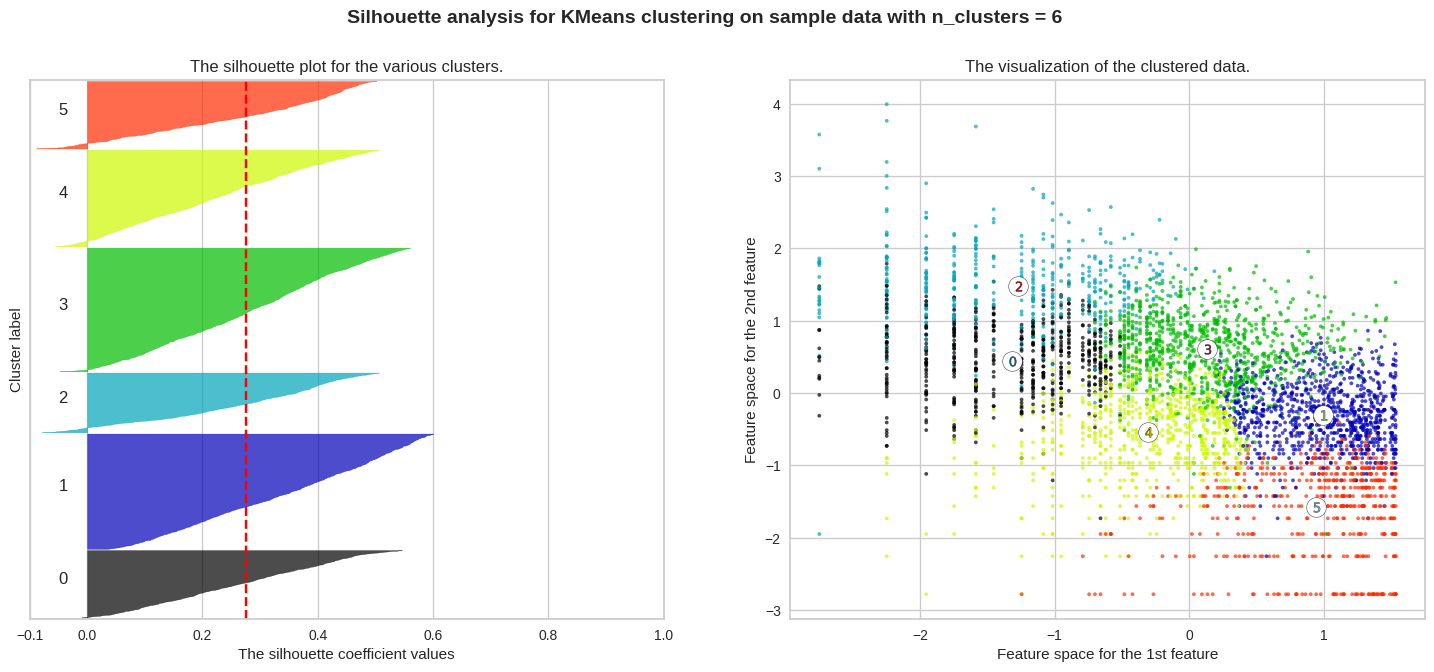

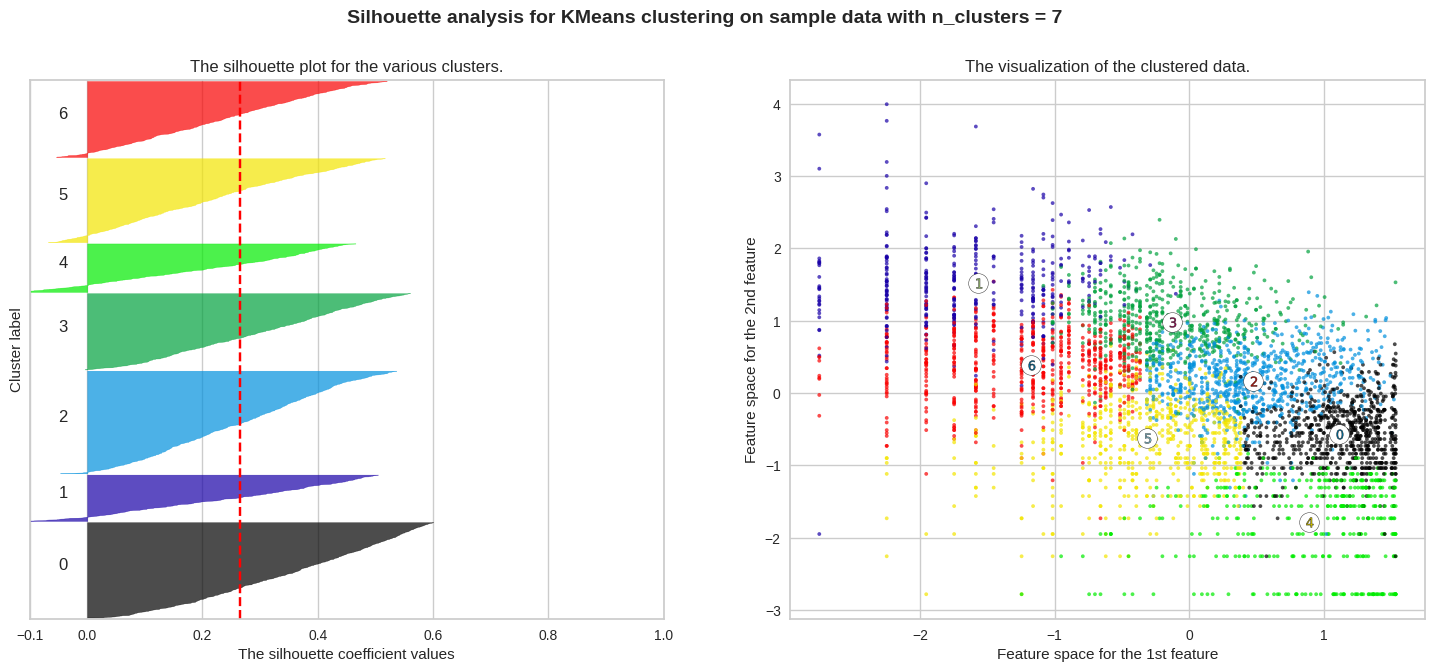

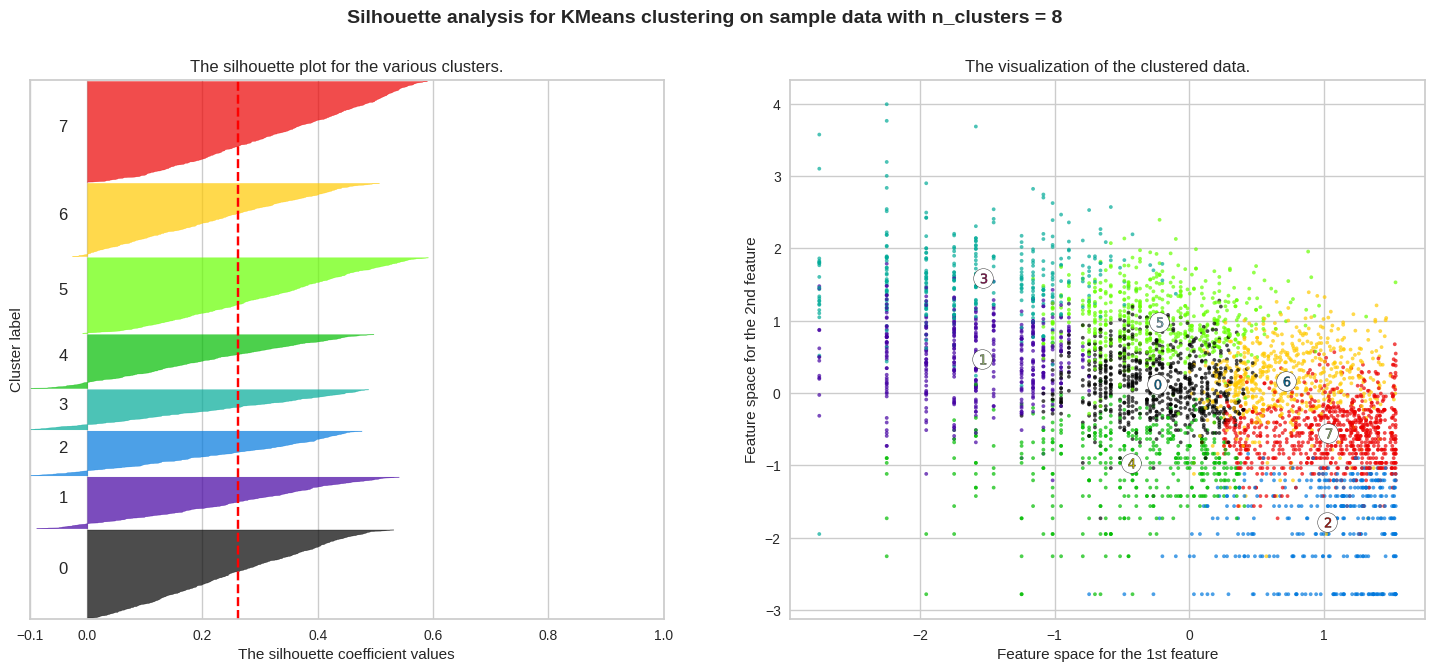

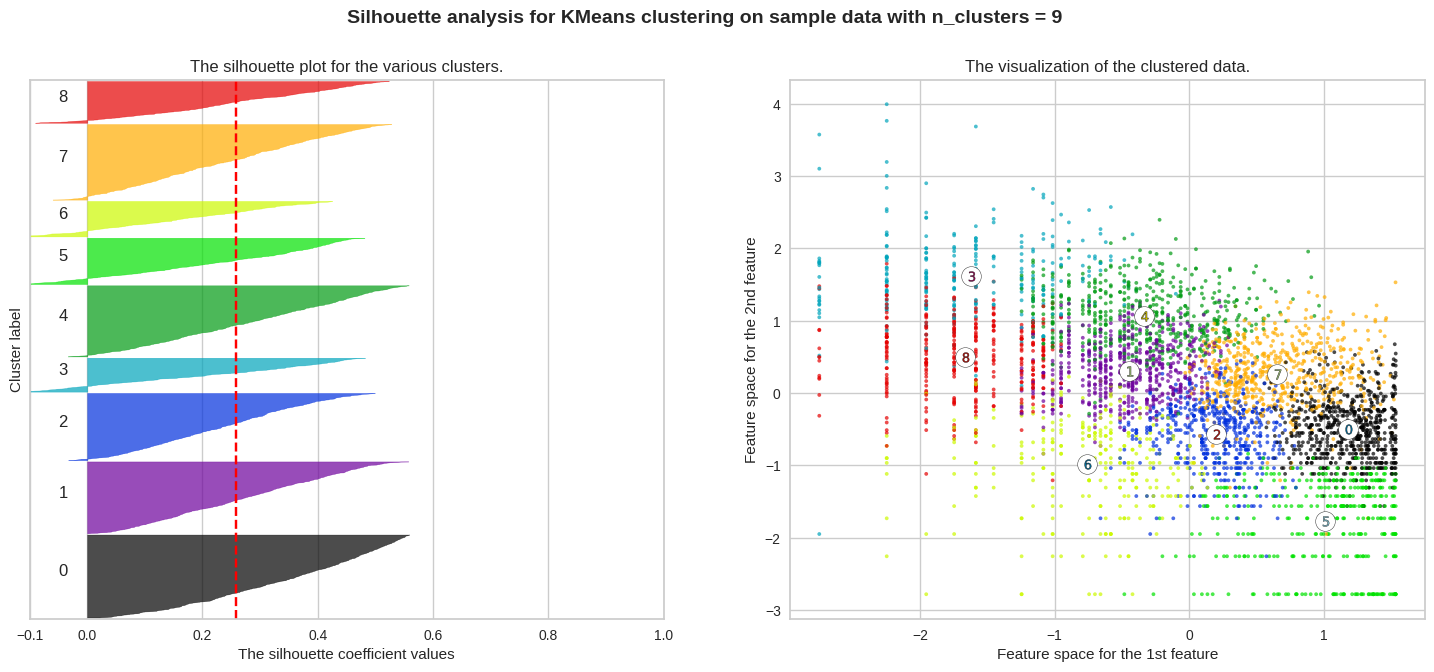

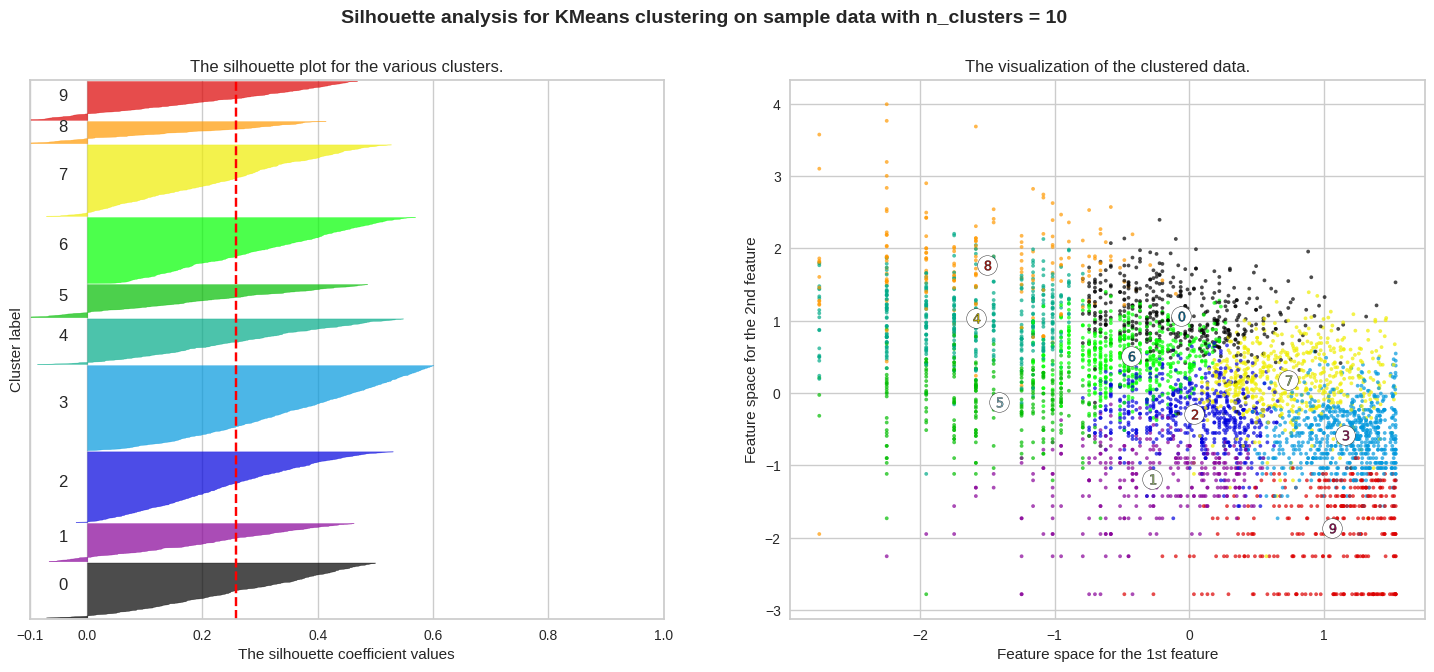

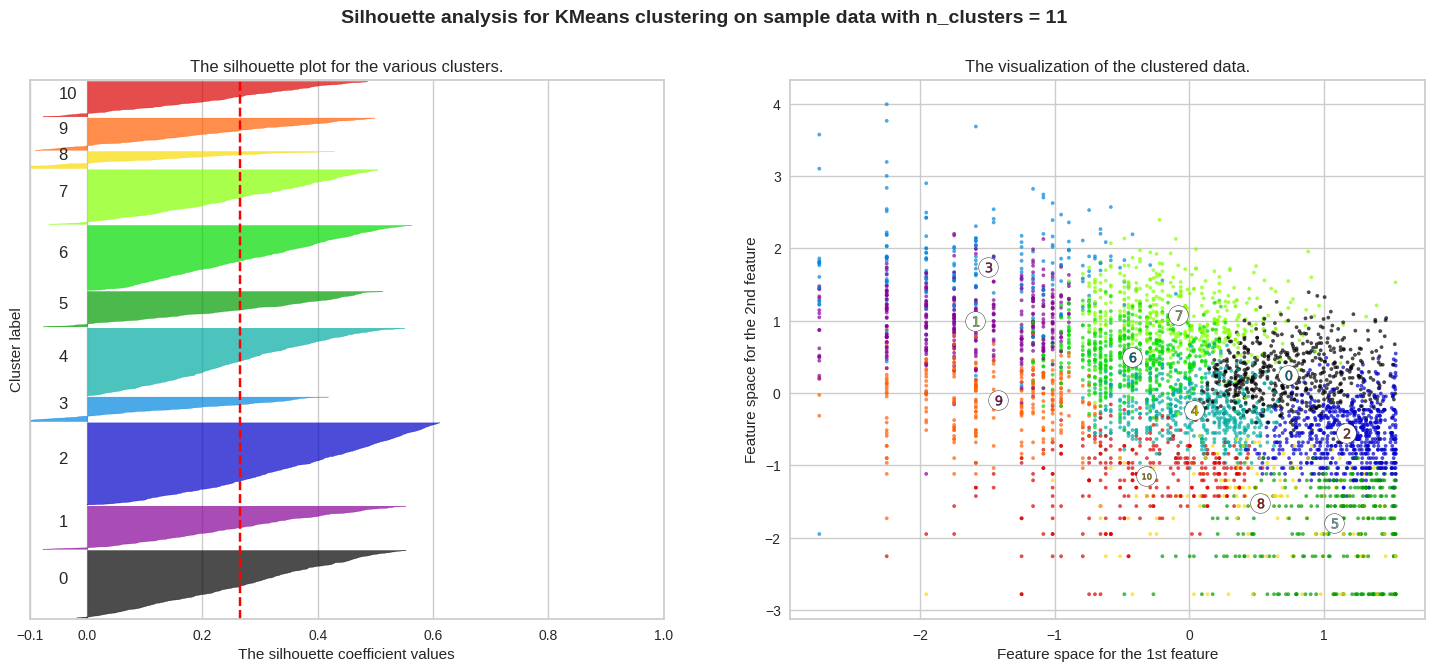

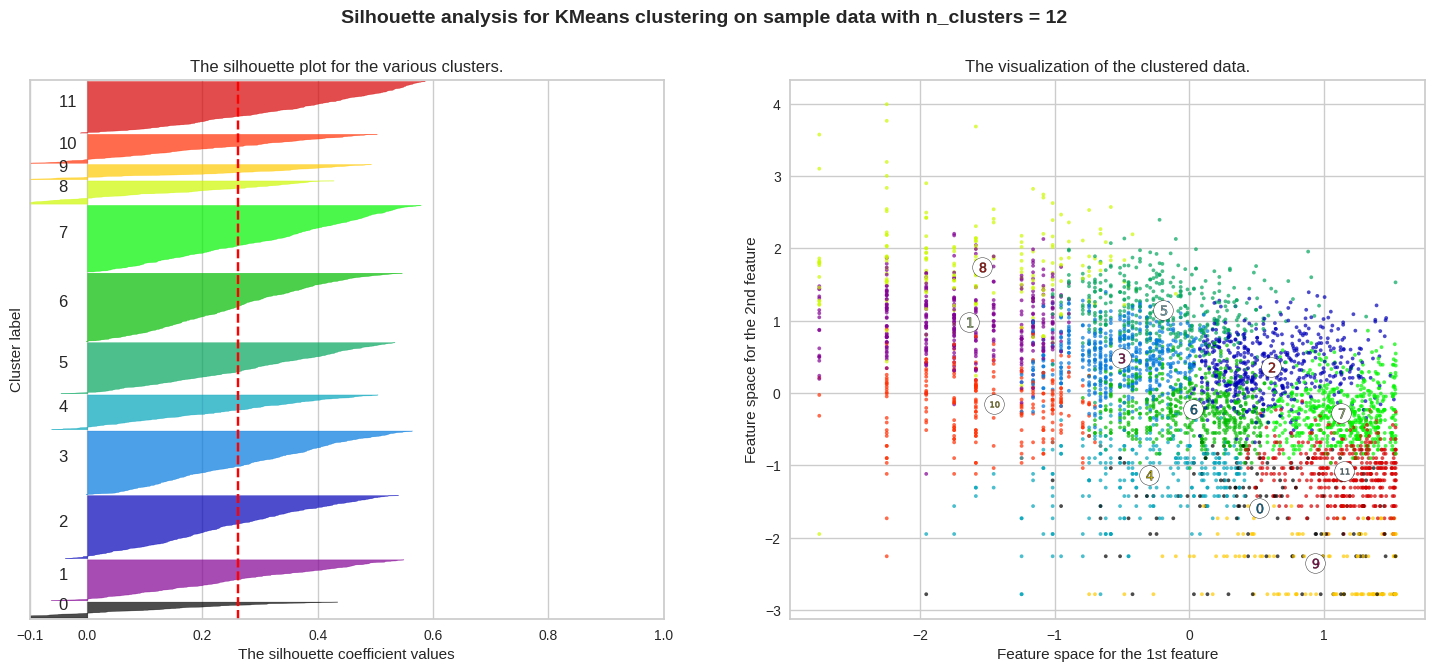

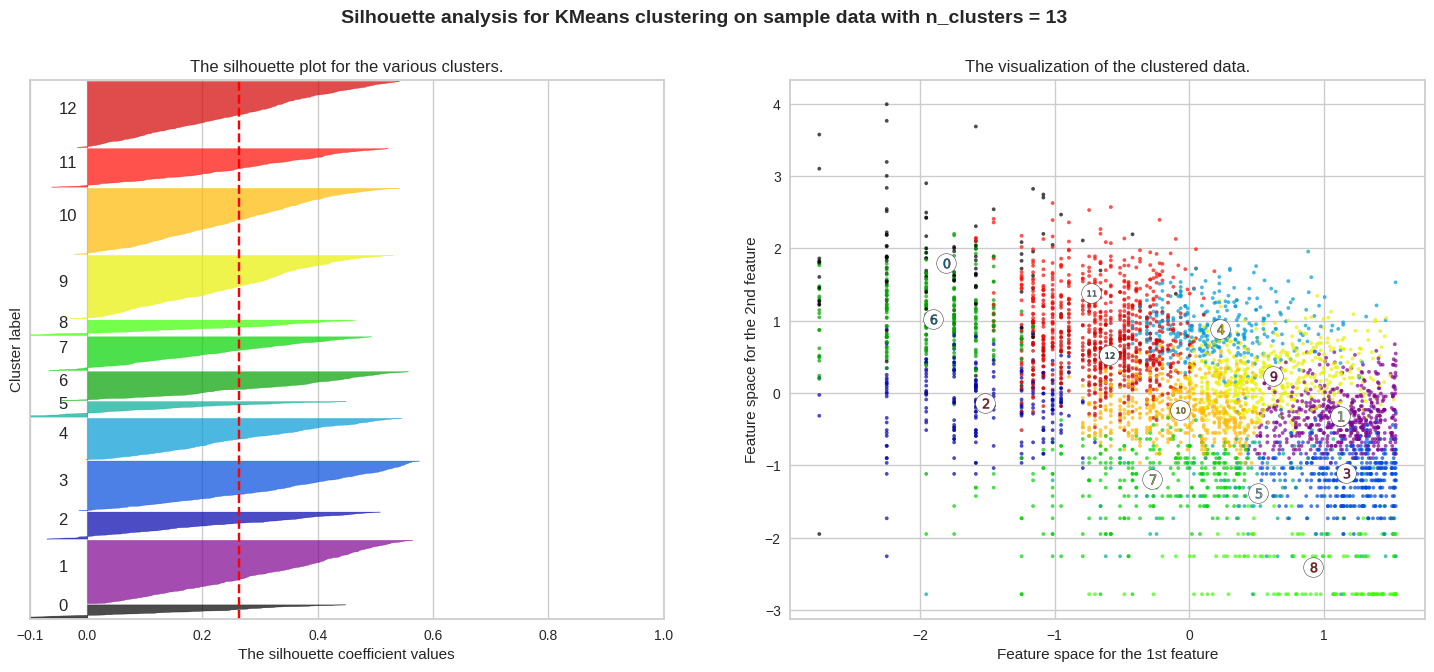

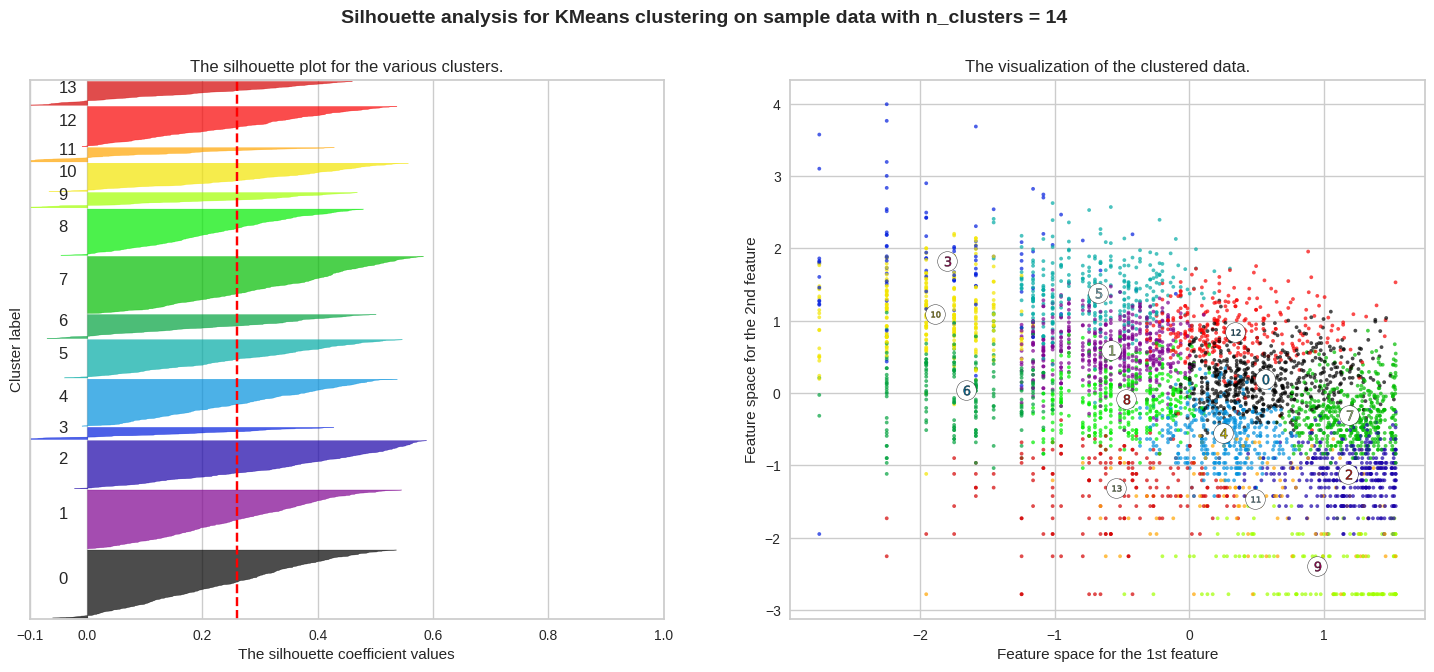

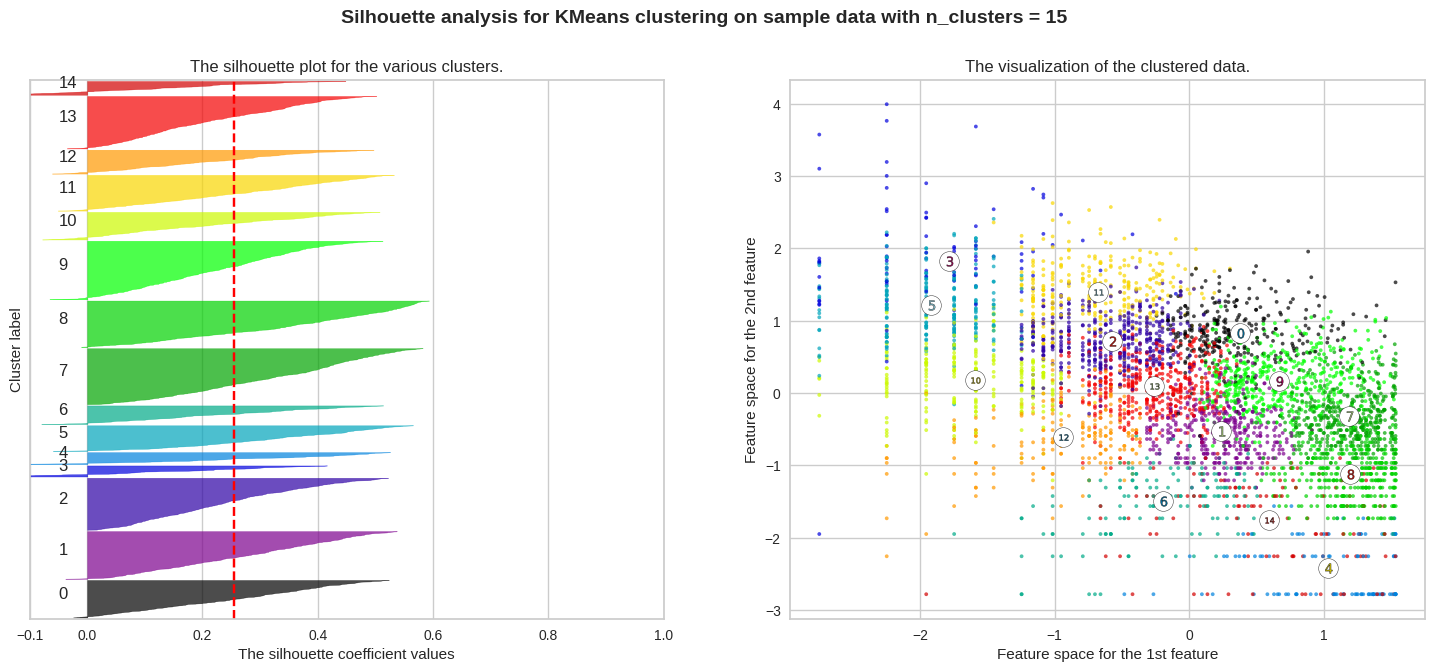

In [ ]:
# Checking silhoutte score for a range of clusters
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(df_scaled[:, 0], df_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(1, 12),
                 timings=False)

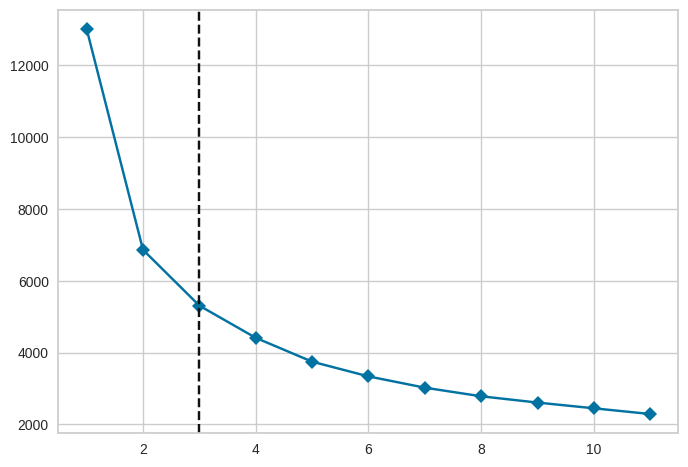

In [ ]:
# Finding optimum clusters using KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(1,12), metric='distortion', timings=False, locate_elbow=True
)
visualizer.fit(df_scaled)

* From the silhoutte analysis we can see that silhoutte score is max for n_cluster=2.
* And according to KElbowVisualizer elbow is at 3, but in the graph we can see that we get a better elbow at k=2.
* So finally I decided to go with n_clusters=2

In [ ]:
# Performing K-Mean Clustering for n_clusters=2
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(df_scaled)

KMeans(max_iter=1000, n_clusters=2)

In [ ]:
# Assigning the clusters for the observation given in the dataset
RFM_KMeans_Clusters=pd.merge(RFM_segmented.reset_index(),Log_Tfd_Data.reset_index(),how='inner',left_on='CustomerID', right_on='CustomerID')
RFM_KMeans_Clusters['Cluster'] = KMean_clust.labels_
RFM_KMeans_Clusters.head(10)

CustomerID  Recency  Frequency  Monetary  R  F  M RFMClass  Recency_log  \
0     12346.0      326          1  77183.60  4  4  1      441        5.787   
1     12347.0        3        182   4310.00  1  1  1      111        1.099   
2     12348.0       76         31   1797.24  3  3  1      331        4.331   
3     12349.0       19         73   1757.55  2  2  1      221        2.944   
4     12350.0      311         17    334.40  4  4  3      443        5.740   
5     12352.0       37         85   2506.04  2  2  1      221        3.611   
6     12353.0      205          4     89.00  4  4  4      444        5.323   
7     12354.0      233         58   1079.40  4  2  2      422        5.451   
8     12355.0      215         13    459.40  4  4  3      443        5.371   
9     12356.0       23         59   2811.43  2  2  1      221        3.135   

   Frequency_log  Monetary_log  Cluster  
0          0.000        11.254        0  
1          5.204         8.369        1  
2          3.434         7.494        1  
3          4.290         7.472        1  
4          2.833         5.812        0  
5          4.443         7.826        1  
6          1.386         4.489        0  
7          4.060         6.984        0  
8          2.565         6.130        0  
9          4.078         7.941        1

In [ ]:
# Plotting Interactive 3d plot for Recency, Frequency and Monetary
fig=px.scatter_3d(Log_Tfd_Data,x=Log_Tfd_Data.loc[:,'Recency_log'],
              y=Log_Tfd_Data.loc[:,'Frequency_log'],
              z=Log_Tfd_Data.loc[:,'Monetary_log'],
              color=KMean_clust.labels_)
fig.update_layout(margin=dict(l=20,t=20,b=20))
fig.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* The ML model used here is K Means Clustering. It is an iterative algorithm that aims to minimize the within-cluster sum of squares (WCSS) or the distance between data points within the same cluster.

* The silhouette score is a measure of how well each data point fits within its assigned cluster in a clustering analysis. It ranges from -1 to 1, where:

  * A score close to 1 indicates that the data point is well clustered and clearly separated from other clusters.
  * A score close to 0 indicates that the data point is close to the decision boundary between two neighboring clusters.
  * A score close to -1 indicates that the data point may have been assigned to the wrong cluster.


In [ ]:
# Calculating silhoutte score for K Means Model
silhouette_score(df_scaled, KMean_clust.labels_)

0.3952491634457792


* In the context of the silhouette score of 0.39 which we are getting for n_clusters=2, it suggests that the data points are relatively well clustered and have a reasonable degree of separation from other clusters. This indicates a moderate level of cluster quality, where the clusters are somewhat distinct and separated, but there is still some overlap or proximity between neighboring clusters.

### ML Model 2 - Hierarchial Clustering

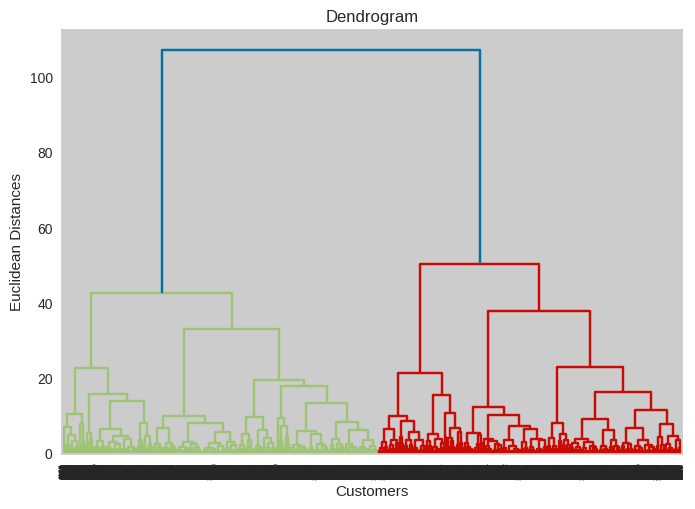

In [ ]:
# Using the dendogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

* The number of clusters will be the number of vertical lines which are being intersected by the line drawn horizontal to x axis passing through the centre of the longest vertical line which here is somewhere b/w 70 and 80.

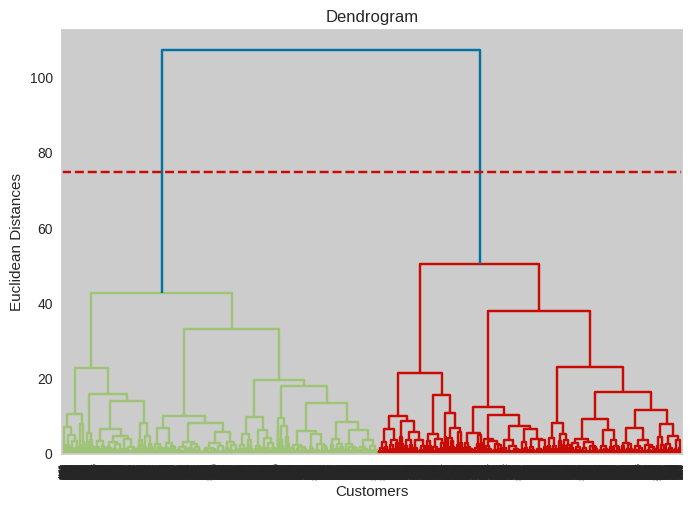

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=75, color='r', linestyle='--')
plt.show()

* So according to this dendogram optimum num of clusters=2.

In [ ]:
# Fitting Agglomerative Clustering Model
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_scaled)

In [ ]:
# Assigning the clusters for the observations given in the dataset
RFM_Hierarchial_Clusters=pd.merge(RFM_segmented.reset_index(),Log_Tfd_Data.reset_index(),how='inner',left_on='CustomerID', right_on='CustomerID')
RFM_Hierarchial_Clusters['Cluster'] = y_hc
RFM_Hierarchial_Clusters.head(10)

CustomerID  Recency  Frequency  Monetary  R  F  M RFMClass  Recency_log  \
0     12346.0      326          1  77183.60  4  4  1      441        5.787   
1     12347.0        3        182   4310.00  1  1  1      111        1.099   
2     12348.0       76         31   1797.24  3  3  1      331        4.331   
3     12349.0       19         73   1757.55  2  2  1      221        2.944   
4     12350.0      311         17    334.40  4  4  3      443        5.740   
5     12352.0       37         85   2506.04  2  2  1      221        3.611   
6     12353.0      205          4     89.00  4  4  4      444        5.323   
7     12354.0      233         58   1079.40  4  2  2      422        5.451   
8     12355.0      215         13    459.40  4  4  3      443        5.371   
9     12356.0       23         59   2811.43  2  2  1      221        3.135   

   Frequency_log  Monetary_log  Cluster  
0          0.000        11.254        1  
1          5.204         8.369        0  
2          3.434         7.494        0  
3          4.290         7.472        0  
4          2.833         5.812        1  
5          4.443         7.826        0  
6          1.386         4.489        1  
7          4.060         6.984        0  
8          2.565         6.130        1  
9          4.078         7.941        0

In [ ]:
# Plotting Interactive 3d plot for Recency, Frequency and Monetary
fig=px.scatter_3d(Log_Tfd_Data,x=Log_Tfd_Data.loc[:,'Recency_log'],
              y=Log_Tfd_Data.loc[:,'Frequency_log'],
              z=Log_Tfd_Data.loc[:,'Monetary_log'],
              color=y_hc)
fig.update_layout(margin=dict(l=20,t=20,b=20))
fig.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* There are mainly two types of hierarchical clustering:
  * Agglomerative hierarchical clustering
  * Divisive Hierarchical clustering

* I have used Agglomerative Hierarchial Clustering here. It is a bottom-up approach to clustering that starts by considering each data point as an individual cluster and progressively merges similar clusters until a stopping criterion is met.

In [ ]:
# Calculating silhoutte score for Hierarchial Model
silhouette_score(df_scaled, y_hc)

0.3626549810580934

* For Agglomerative Hierarchial Clustering model I am getting a silhoutte_score of 0.362 which means the clusters are well seperated.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* The silhouette score is a measure of how well each data point fits within its assigned cluster in a clustering analysis. It ranges from -1 to 1, where:

  * score close to 1 indicates that the data point is well clustered and clearly separated from other clusters.
  * A score close to 0 indicates that the data point is close to the decision boundary between two neighboring clusters.
  * A score close to -1 indicates that the data point may have been assigned to the wrong cluster.

### Comparing these scores, we can observe that the K-means clustering model performed slightly better in terms of cluster separation and compactness, as it achieved a higher silhouette score of 0.39. A higher silhouette score indicates that the data points within each cluster are more similar to each other than to data points in other clusters, suggesting a better-defined clustering structure.

# **Conclusion**

* In conclusion, the online retail customer segmentation project successfully utilized unsupervised machine learning techniques to gain valuable insights and improve business strategies. Through the application of K-means clustering and hierarchical clustering, we were able to identify distinct customer segments and understand their behaviors and preferences.

* Key findings from the project include the identification of the highest amount invoice, top and bottom ordered products, time series analysis showing a gradual increase in total sales amount per day, and the observation of sales patterns across different days of the month. These insights provide valuable guidance for inventory management, targeted marketing, and resource allocation.

* Additionally, the analysis of customer segmentation by country revealed the top five countries with the highest number of customers, as well as the bottom five countries with the least number of customers. This information can inform market expansion strategies and customer acquisition efforts.

* Evaluation metrics such as silhouette scores were used to assess the quality of clustering models, with the K-means clustering model outperforming hierarchical clustering in terms of cluster separation and compactness.

* Overall, the project highlights the importance of understanding customer behavior and preferences in the online retail industry. By leveraging the gained insights, businesses can enhance customer satisfaction, optimize marketing campaigns, and maximize profitability. It is important to continue refining and updating the segmentation models and analysis techniques as the business evolves and new data becomes available.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***